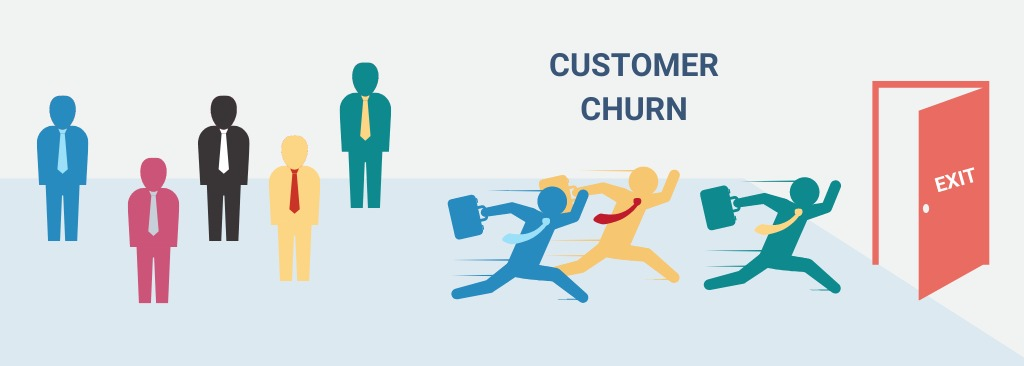

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
from google.colab import drive
from scipy.stats import ttest_ind

### Helper Functions

In [ ]:
def pie_count_categorical(df , column_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(8,4))
    ax = sns.countplot(df, x = column_name , ax = ax1)
    pie_df = pd.DataFrame(df[column_name].value_counts())
    ax2.pie(pie_df[column_name].values , labels=pie_df[column_name].keys() , autopct='%1.1f%%')
    ax2.set_aspect('equal')

In [ ]:
def plot_count_two_column_normalized(df , col1, col2):

    count_data = df.groupby([col1, col2]).size().reset_index(name='Count')
    total_data = df.groupby(col1).size().reset_index(name='Total')
    count_data = count_data.merge(total_data, on=col1)
    count_data['Ratio'] = count_data['Count'] / count_data['Total']

    ax = sns.barplot(data = count_data, x = col1, y ='Ratio', hue = col2, errorbar=None)

    # Annotate each bar with the percentage value
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=10, color='black')
    plt.show()

In [ ]:
def plot_cat_num_columns(df , cat_column , num_column):

  # box plot and histplot
  plt.figure(figsize=(8,4))
  sns.boxplot(df, x= num_column , y= cat_column)

  fig, axes = plt.subplots(nrows = 2 , ncols = 1, figsize = (7.53, 6), sharey=True)

  for i, category_value in enumerate(df[cat_column].unique()):
      sns.histplot(df[df[cat_column] == category_value][num_column],kde = True, bins = 40 , ax = axes[i] , stat ='proportion')
      axes[i].set_title(f'Histogram for {category_value}')
      axes[i].set_xlabel(f'{num_column}')


  # Adjust layout
  plt.tight_layout()
  plt.show()


In [ ]:
###Function to plot stacked bar chart
def tab_plot (index,column):
    tabs=pd.crosstab(index=index,columns=column,normalize='index')
    tabs.plot(kind='bar',stacked=True)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.show();

In [ ]:
###Function to use chi square test
def chi2_test(index,column):
    tabs=pd.crosstab(index=index,columns=column)
    print('Statistic = ',chi2_contingency(tabs)[0],'\nP-value = ',chi2_contingency(tabs)[1])

In [ ]:
###Function to plot stacked bar chart horizontal
def tab_plot_h (index,column,orient='v'):
    tabs=pd.crosstab(index=index,columns=column,normalize='index')
    tabs.plot(kind='barh',stacked=True)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.show();

### Data Prepration and preprocessing:

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert TotalCharges from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', pd.NA, regex=True))

In [ ]:
# Check the nulls
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [ ]:
(df['tenure'] == 0).sum()

11

In [ ]:
df[(df['tenure'] == 1)]['tenure'].sum() , df[(df['MonthlyCharges'] == df['TotalCharges'])]['tenure'].sum()

(613, 613)

- the customers with tenure equal 1 has a value of monthlycharges equal to totalcharges

- the missing values in totalcharges are only for the customers who has tenure of 0  (which means they didnt complete a month) but the existing of those customers in the data means they Pay at least the monthly charges so  we will impute the missing in total charges using monthlycharges

In [ ]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [ ]:
# Check for dublicates
duplicates_count = df.duplicated().sum()
print(duplicates_count)

0


### What factors have the greatest impact on customer churn, and how can these factors be addressed to reduce churn rates?

In [ ]:
#calculating churn rate first
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
churn_conf_interval = sm.stats.proportion_confint(df['Churn'].value_counts()['Yes'], len(df), alpha=0.05, method='normal')
churn_conf_interval

(0.25505819093335796, 0.2756815506540338)

In [ ]:
#looking at the numerical columns
df.describe()[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


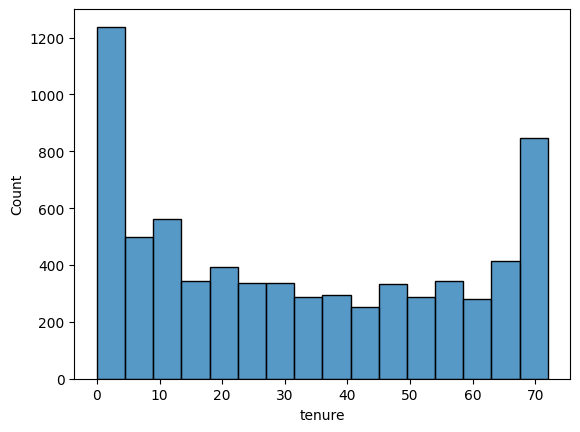

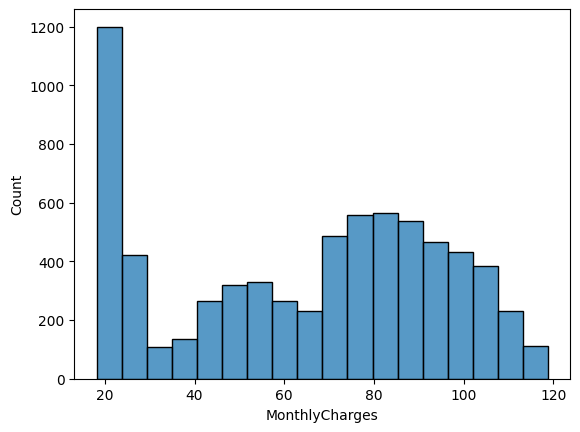

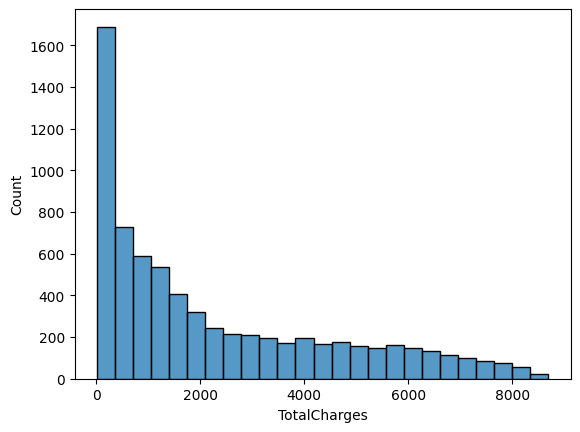

In [ ]:
#drawing histogram for each numerical variable
for col in ['tenure','MonthlyCharges','TotalCharges']:
  sns.histplot(df[col])
  plt.show()

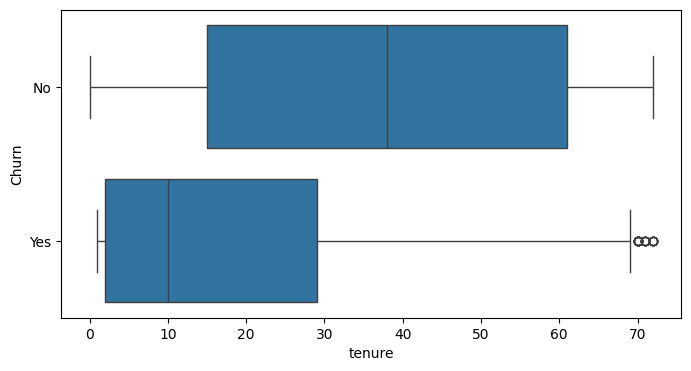

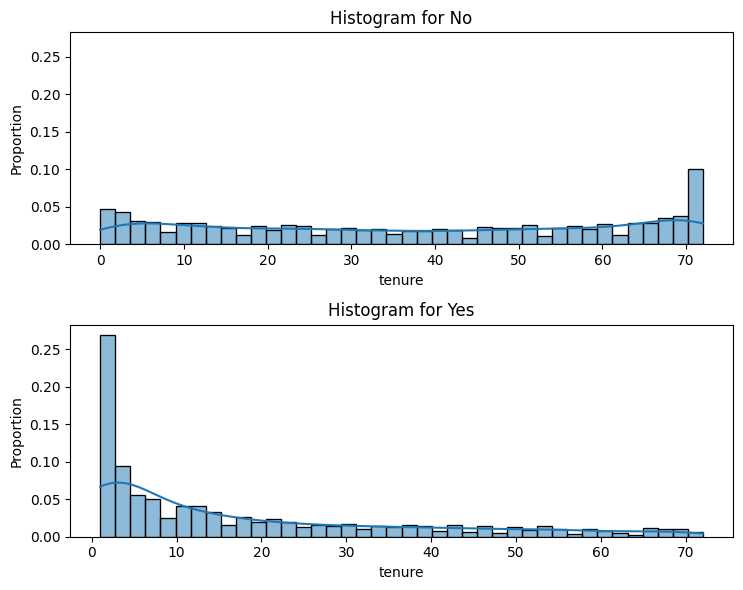

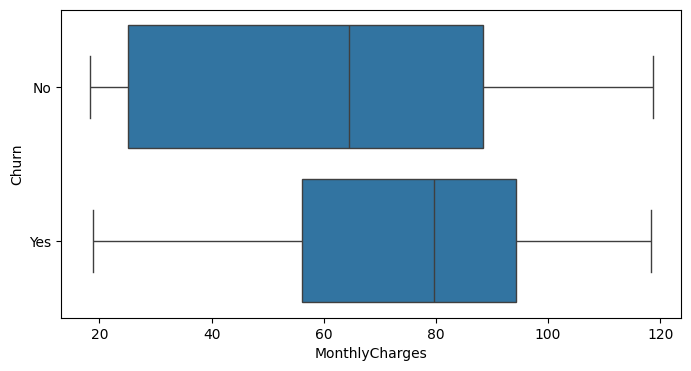

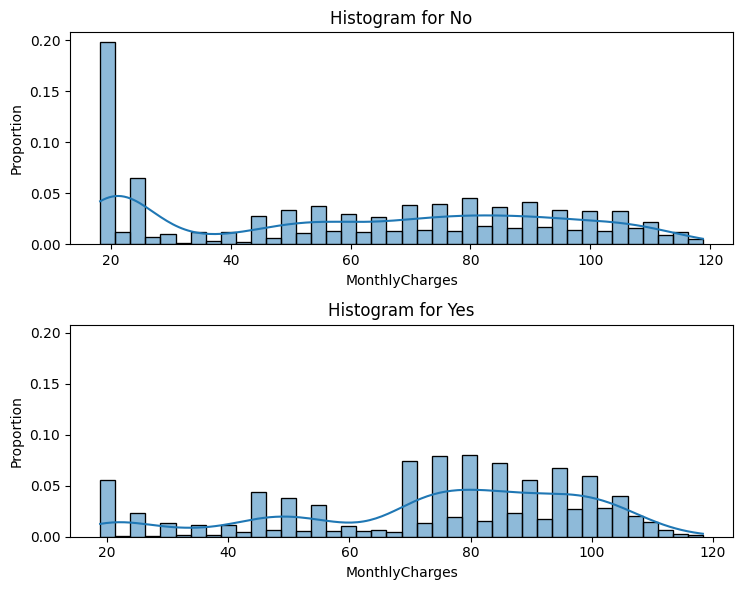

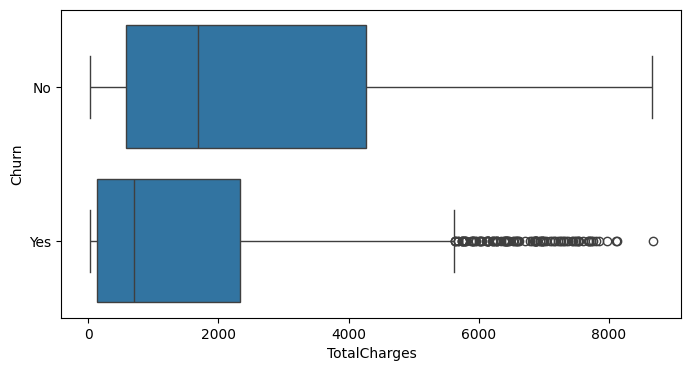

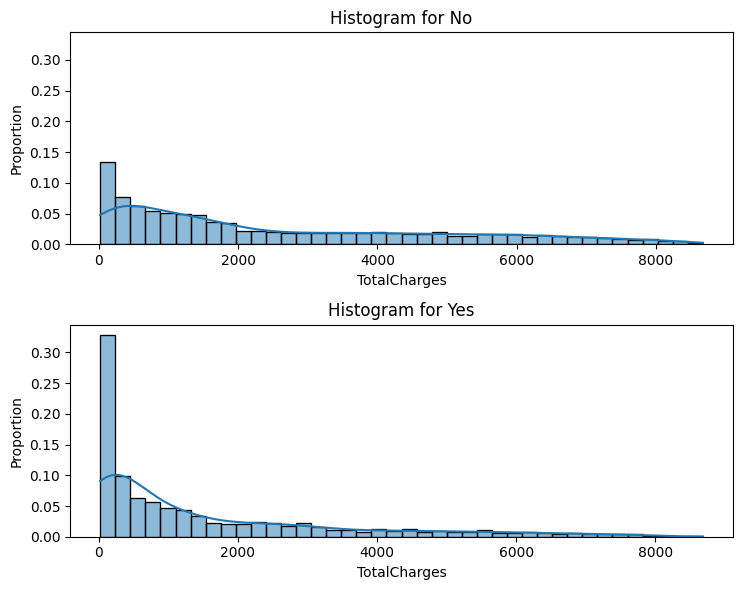

In [ ]:
#Numerical variables with churn rate
for col in ['tenure','MonthlyCharges','TotalCharges']:
   plot_cat_num_columns(df, 'Churn',col)
   plt.show();

- categorical columns:

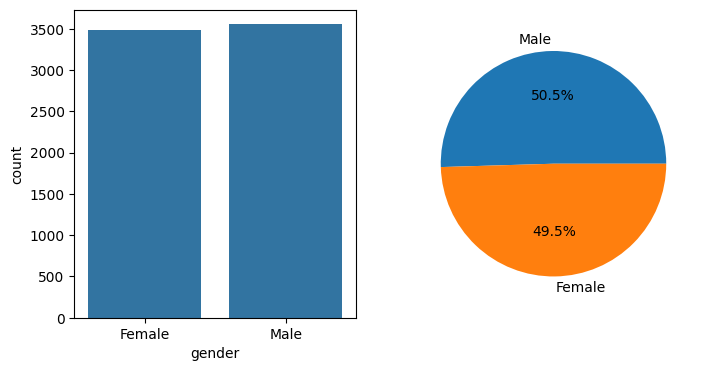

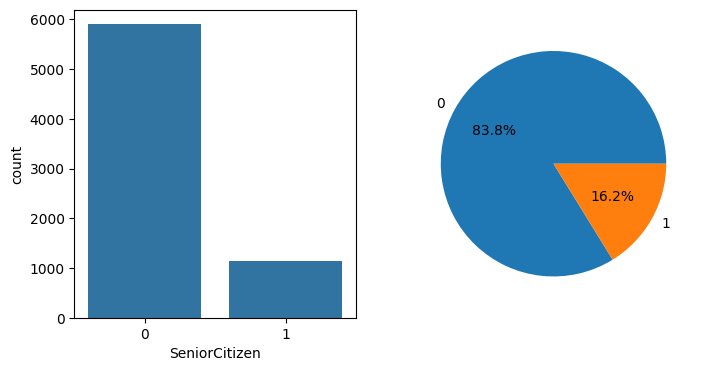

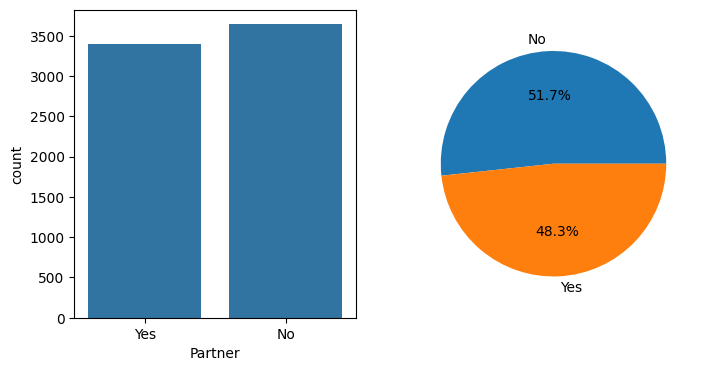

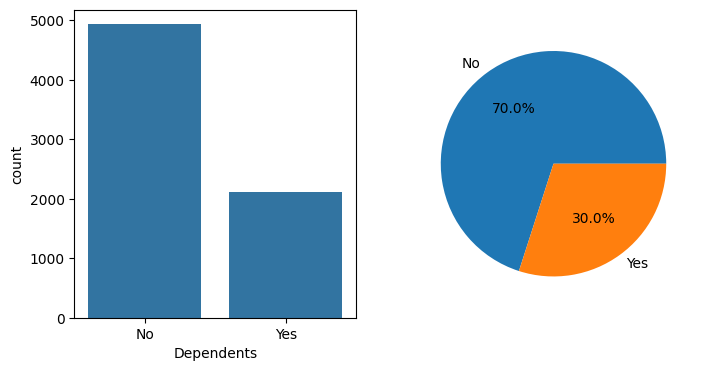

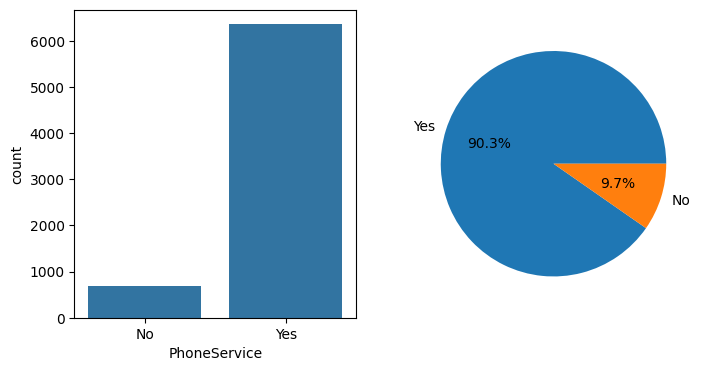

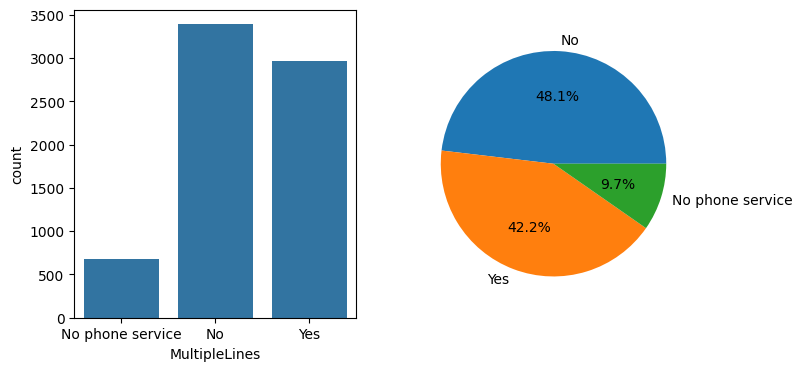

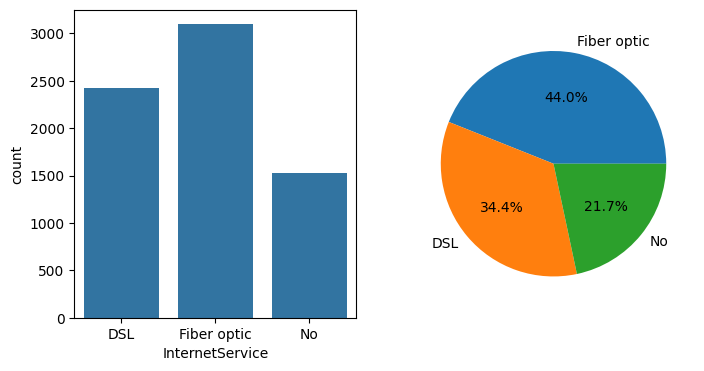

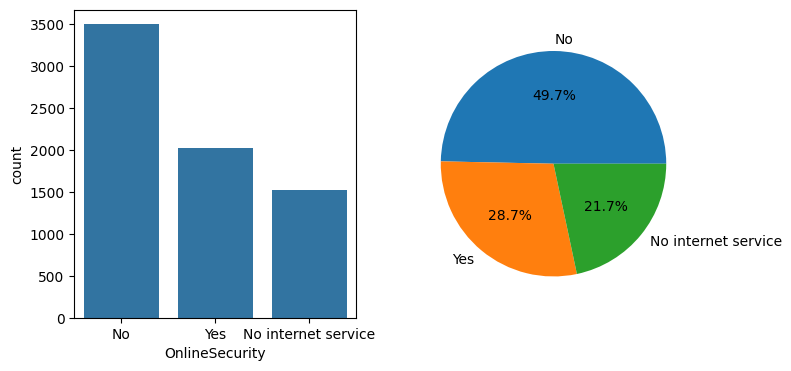

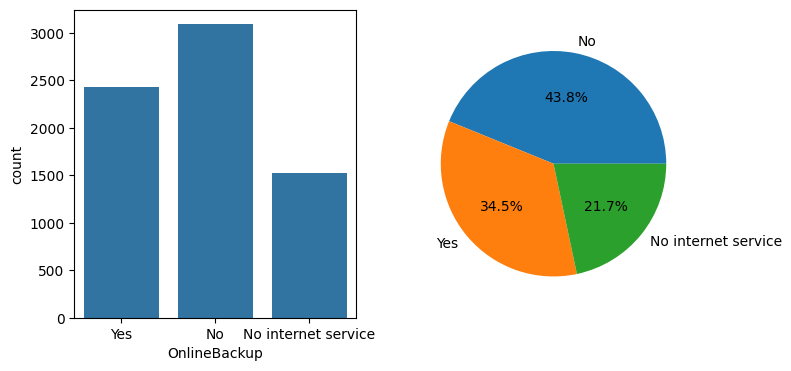

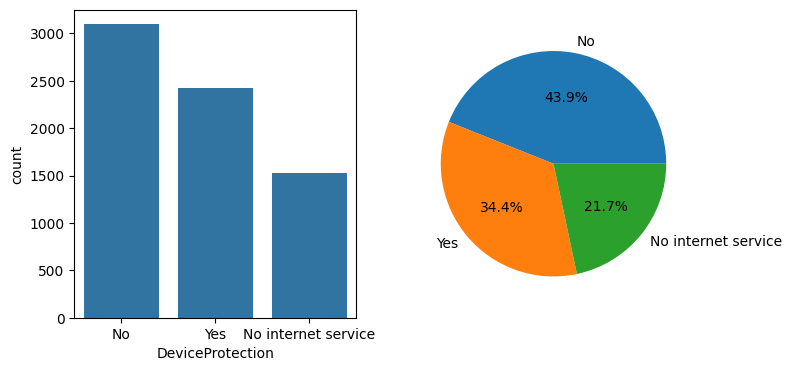

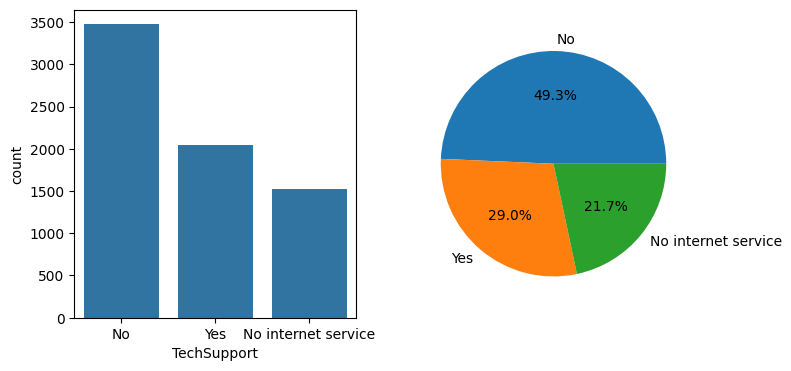

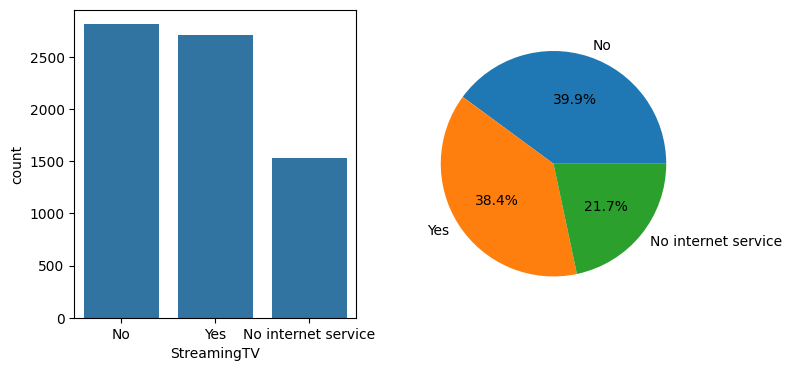

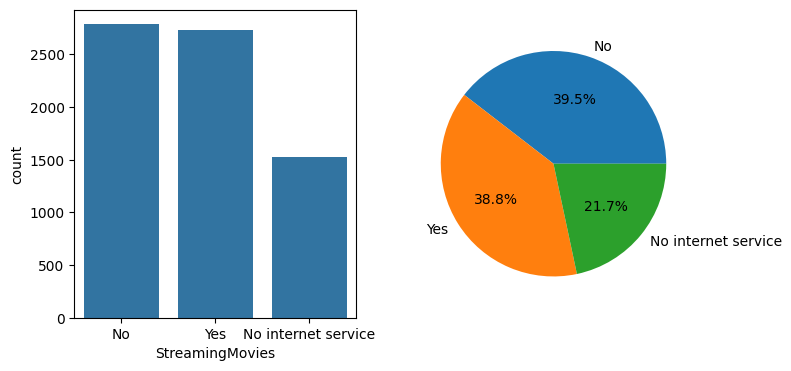

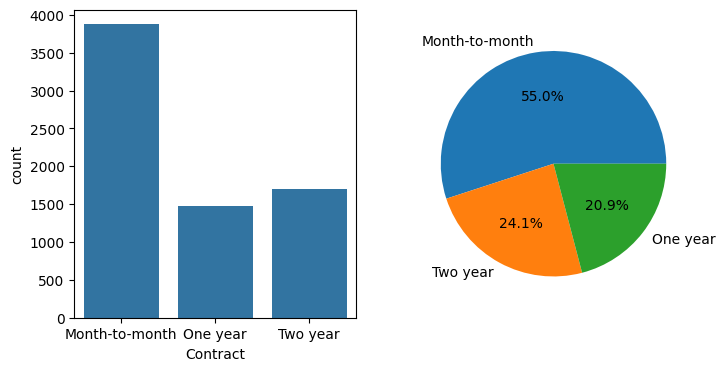

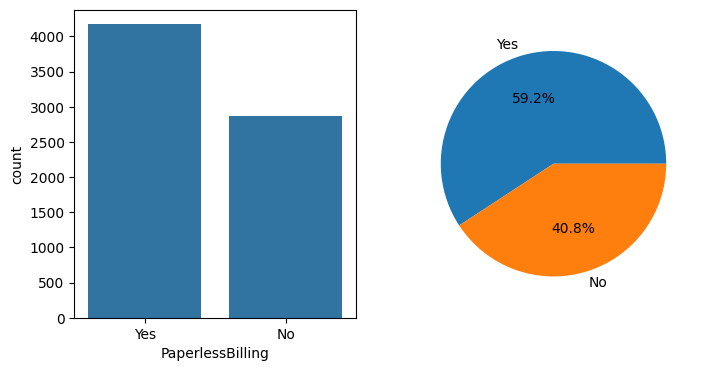

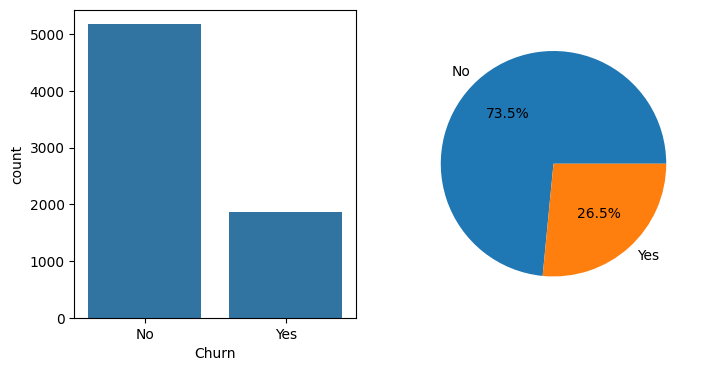

In [ ]:
cat_cols = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','Churn']
for col in cat_cols:
  pie_count_categorical(df , col);
  plt.show()

### How does the type of interne service affect customer churn rates?

##### What is the Internt Service Distribution among Customers?

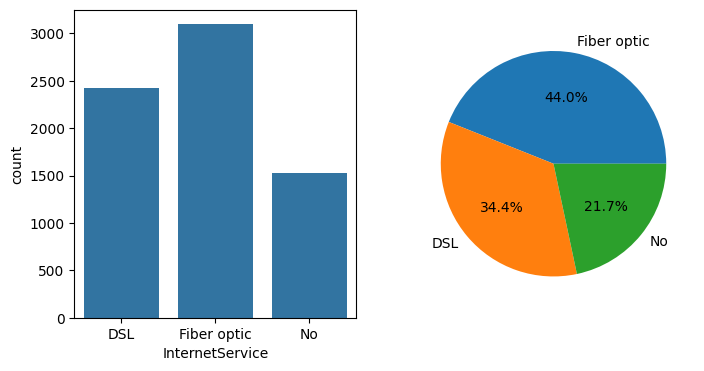

In [ ]:
pie_count_categorical(df , 'InternetService')

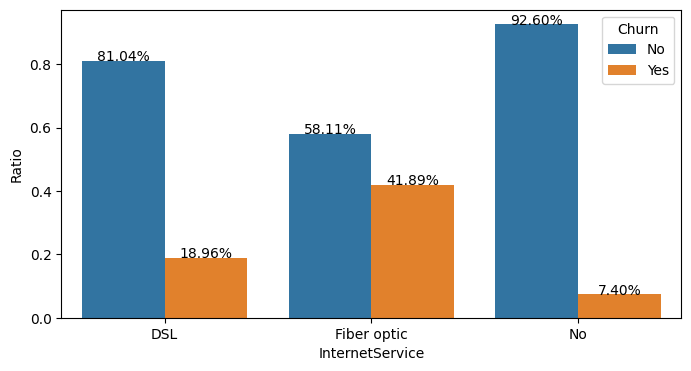

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df , 'InternetService', 'Churn')

##### Does having Internet service affect churn rates ?

In [ ]:
mapping = {'DSL': 'Yes', 'Fiber optic': 'Yes', 'No': 'No'}
df['InternetService_binary'] = df['InternetService'].map(mapping)

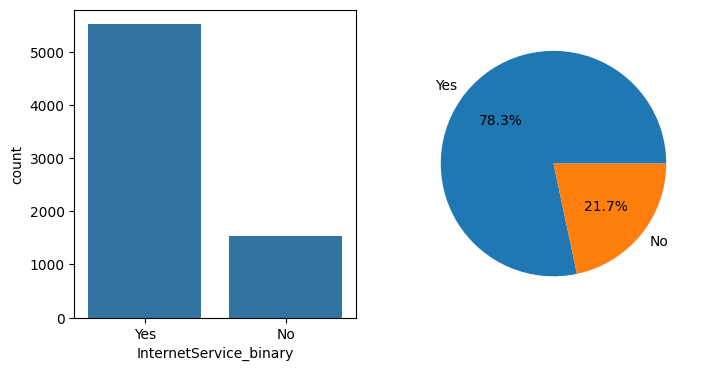

In [ ]:
pie_count_categorical(df , 'InternetService_binary')

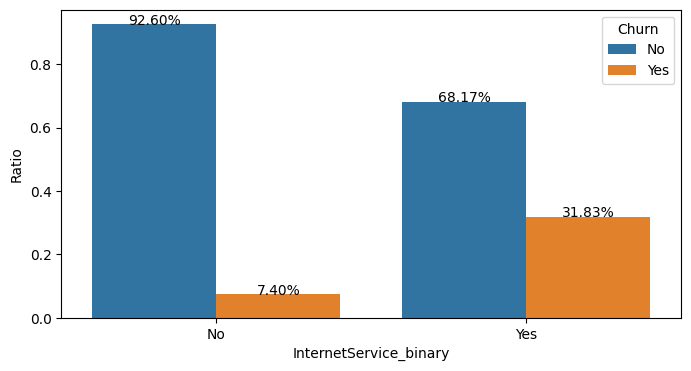

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df , 'InternetService_binary', 'Churn')

Hypothesis Testing:

- H0: p_Internet_Service_Subscribers in Churners = p_Internet_Service_Subscribers in Non-churners
- H1: p_Internet_Service_Subscribers in Churners != p_Internet_Service_Subscribers in Non-churners

In [ ]:
df_test = pd.crosstab(index=df['Churn'],columns=df['InternetService_binary'],margins=True)
df_test

InternetService_binary,No,Yes,All
Churn,,,
No,1413,3761,5174
Yes,113,1756,1869
All,1526,5517,7043


In [ ]:
z_score, p_value = proportions_ztest(count = np.array([df_test['No']['Yes'] , df_test['Yes']['Yes']]),
                                     nobs = np.array([df_test['No']['All'] , df_test['Yes']['All']]),alternative='two-sided')

In [ ]:
print('Statistic = ', z_score,'\np-value = ', p_value)

Statistic =  -19.12515526956875 
p-value =  1.5590850317785411e-81


- The p_value is so small, so we reject the null hypothesis. There is a significant difference in the proportion of churners among customers who have internet service and those who don't. Customers with Internet Service churn more.

 ##### Is there a significant difference between the churn rate among those who have DSL and Fiber Optics?

In [ ]:
df_internetservice = df[(df['InternetService'] != 'No')]

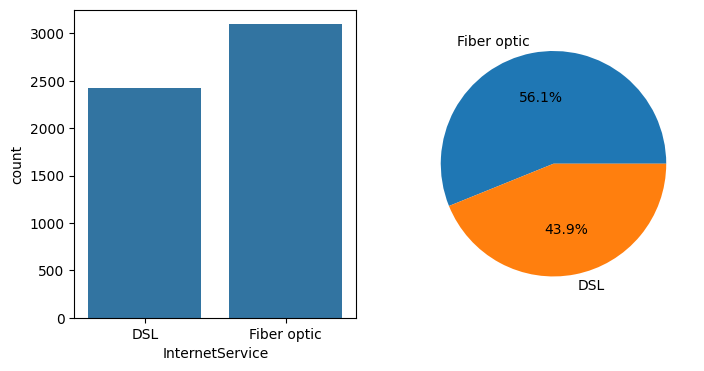

In [ ]:
pie_count_categorical(df_internetservice , 'InternetService')

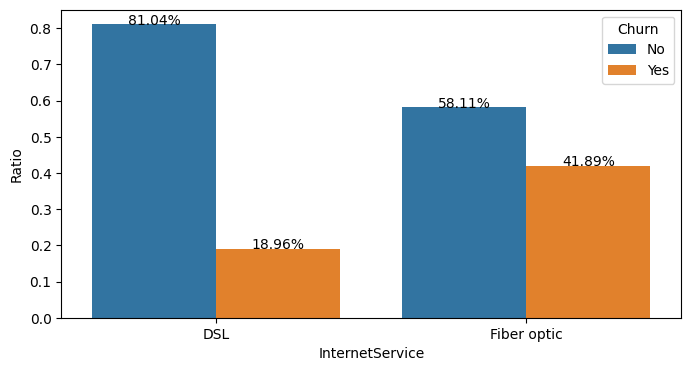

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df_internetservice , 'InternetService', 'Churn')

Hypothesis Testing:

- H0: p_DSL_Subscribers in Churners = p_Fiber_Optic_Subscribers in Churners
- H1: p_DSL_Subscribers in Churners != p_Fiber_Optic_Subscribers in Churners

In [ ]:
df_test = pd.crosstab(index = df_internetservice['Churn'] , columns = df_internetservice['InternetService'], margins = True)
df_test

InternetService,DSL,Fiber optic,All
Churn,,,
No,1962,1799,3761
Yes,459,1297,1756
All,2421,3096,5517


In [ ]:
z_score, p_value = proportions_ztest(count = np.array([df_test['DSL']['Yes'] , df_test['Fiber optic']['Yes']]),
                                     nobs = np.array([df_test['DSL']['All'] , df_test['Fiber optic']['All']]),alternative='two-sided')

In [ ]:
print('Statistic = ', z_score,'\np-value = ', p_value)

Statistic =  -18.147163580011767 
p-value =  1.3520464229927545e-73


- The p-value is so small, so we can reject the null hypothesis. there is a significant difference between churners in DSL users and Fiber Optics users. Customers who use Fiber Optics tend to have a higher churn rate.


Conclusion:
- 44% of the customers have fiber optics Internet service and tend to have the highest churning rate.
- 34.4% of customers have DSL internet service, so they have a lower churrning rate.
- There is a problem with customers with fiber optics as their churning rate is about 42% and thus some attention needs to be given to this category as they represent 44% of the customers.


##### Is there a relation between Tenure and Internet service Type ?

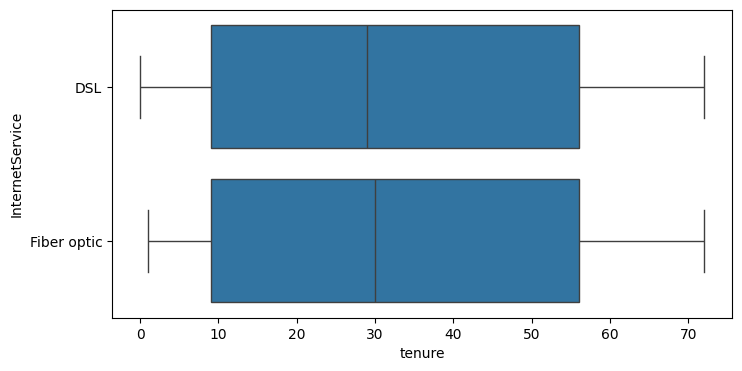

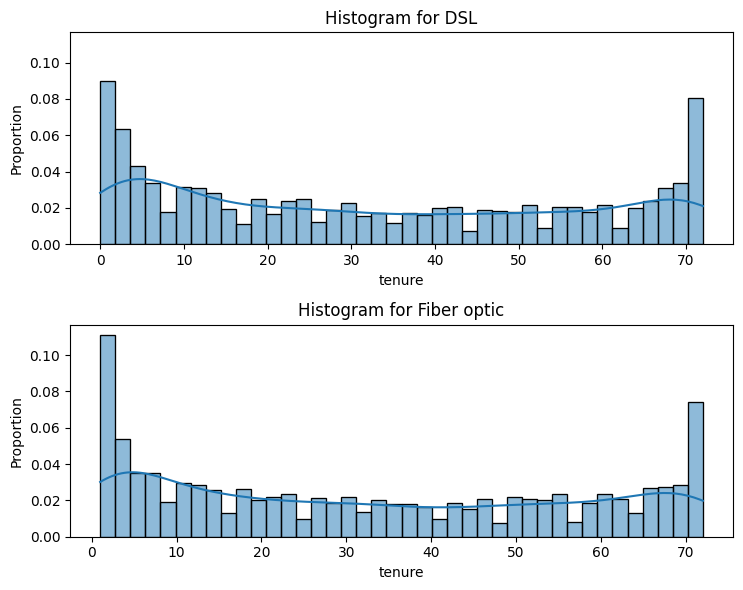

In [ ]:
plot_cat_num_columns(df_internetservice , 'InternetService' , 'tenure')

- No significant difference between tenure distribution among DSL and Fiber Optics users.

Hypothesis Testing:

- H0: Mean(tenure) for DSL Users = Mean(tenure) for Fiber Optics Users
- H1: Mean(tenure) for DSL Users != Mean(tenure) for Fiber Optics Users

In [ ]:
t_statistic, p_value = ttest_ind(df_internetservice[df_internetservice['InternetService'] == 'DSL']['tenure'],
                                 df_internetservice[df_internetservice['InternetService'] == 'Fiber optic']['tenure'], equal_var = False)

In [ ]:
print('Statistic = ', z_score,'\np-value = ', p_value)

Statistic =  -18.147163580011767 
p-value =  0.8853614009774495


- The p-value is large, so we can't reject the null hypothesis. There is no enough evidence to say that the mean of the tenure is affected by the type of Internet Service subscribed.


##### Investigate if certain combinations of services are more prone to churn. Analyze which services are commonly bundled together among churned customers.

In [ ]:
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

services_data = df[service_columns]

# Encode the feautres
mapping = {'Yes': 1 , 'No': 0}
services_data['PhoneService'] = services_data['PhoneService'].map(mapping)

mapping = {'Yes': 1 , 'No': 0 , 'No phone service' : 0}
services_data['MultipleLines'] = services_data['MultipleLines'].map(mapping)

mapping = {'DSL': 1 , 'Fiber optic': 1 , 'No': 0}
services_data['InternetService'] = services_data['InternetService'].map(mapping)

mapping = {'Yes': 1 , 'No internet service': 0 , 'No': 0}
services_data['OnlineSecurity'] = services_data['OnlineSecurity'].map(mapping)

mapping = {'Yes': 1 , 'No internet service': 0 , 'No': 0}
services_data['OnlineBackup'] = services_data['OnlineBackup'].map(mapping)

mapping = {'Yes': 1 , 'No internet service': 0 , 'No': 0}
services_data['DeviceProtection'] = services_data['DeviceProtection'].map(mapping)

mapping = {'Yes': 1 , 'No internet service': 0 , 'No': 0}
services_data['TechSupport'] = services_data['TechSupport'].map(mapping)

mapping = {'Yes': 1 , 'No internet service': 0 , 'No': 0}
services_data['StreamingTV'] = services_data['StreamingTV'].map(mapping)

mapping = {'Yes': 1 , 'No internet service': 0 , 'No': 0}
services_data['StreamingMovies'] = services_data['StreamingMovies'].map(mapping)

df['TotalServices'] = services_data[service_columns].sum(axis = 1)

<ipython-input-48-303f40ce14a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  services_data['PhoneService'] = services_data['PhoneService'].map(mapping)
<ipython-input-48-303f40ce14a4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  services_data['MultipleLines'] = services_data['MultipleLines'].map(mapping)
<ipython-input-48-303f40ce14a4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

<Figure size 1200x500 with 0 Axes>

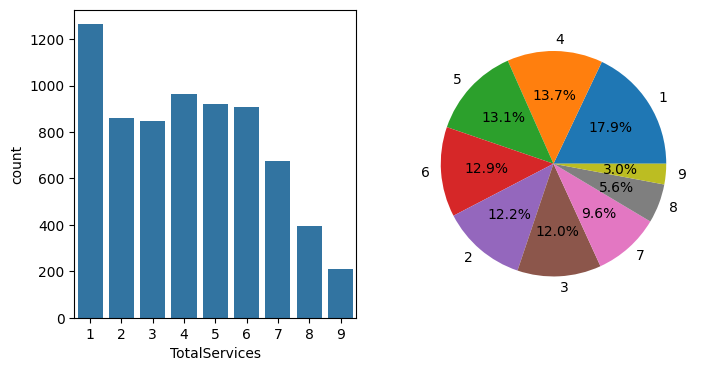

In [ ]:
plt.figure(figsize = ( 12 , 5 ))
_ = pie_count_categorical(df , 'TotalServices')

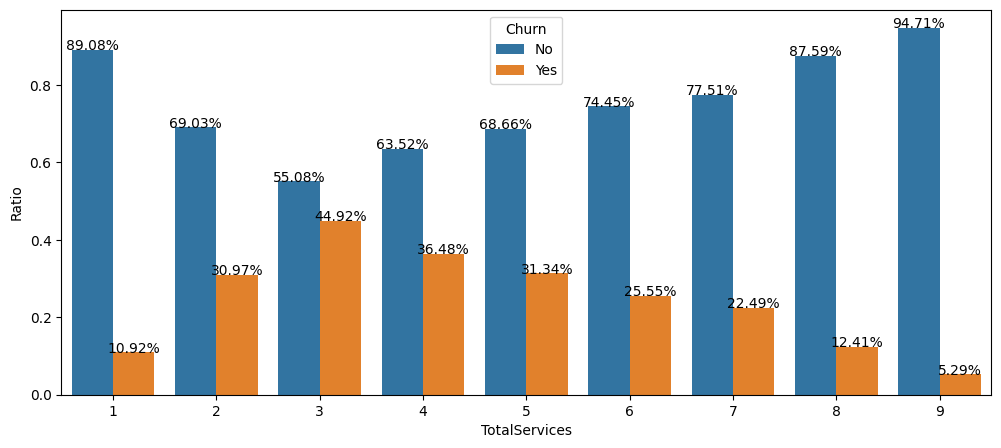

In [ ]:
plt.figure(figsize = ( 12 , 5 ))
_ = plot_count_two_column_normalized(df , 'TotalServices', 'Churn')

In [ ]:
services_3_df = df[df['TotalServices'] == 3]

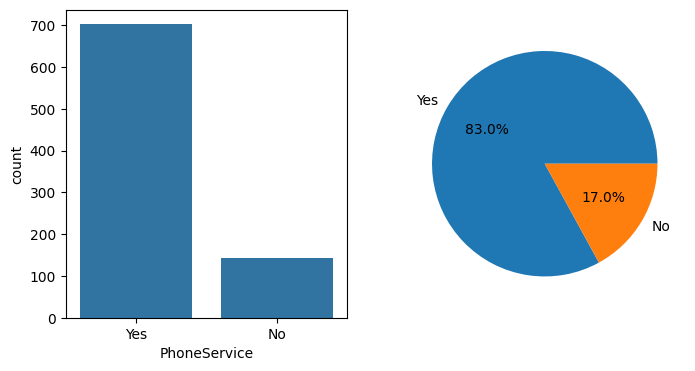

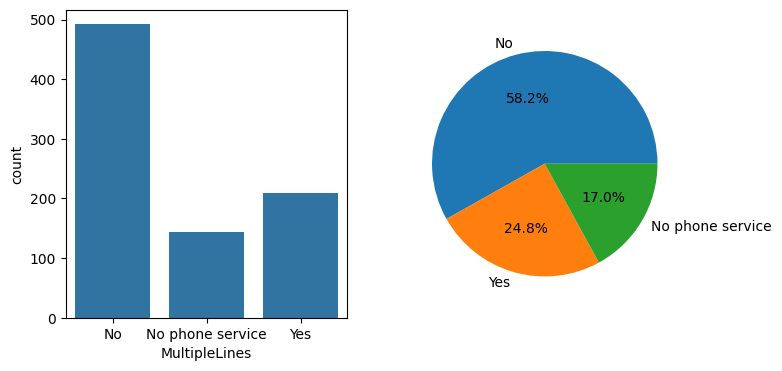

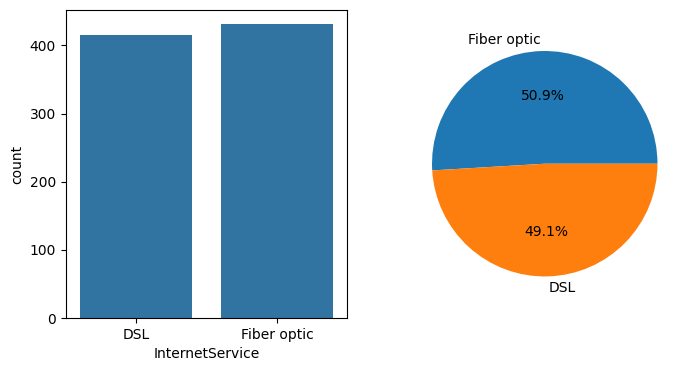

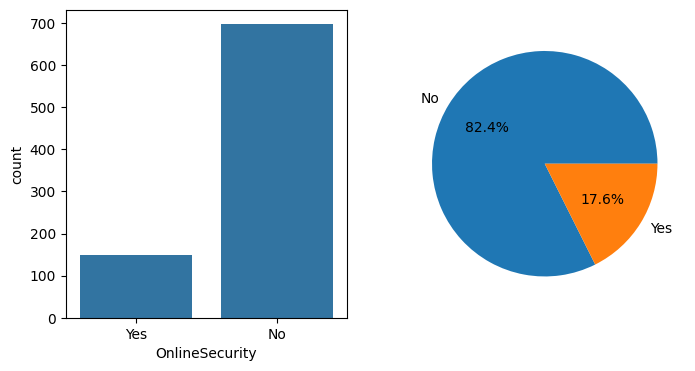

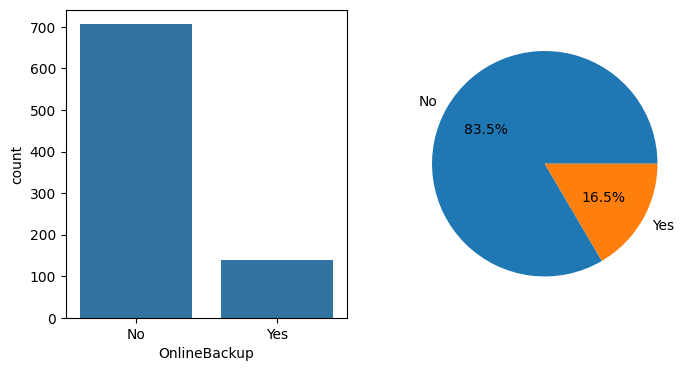

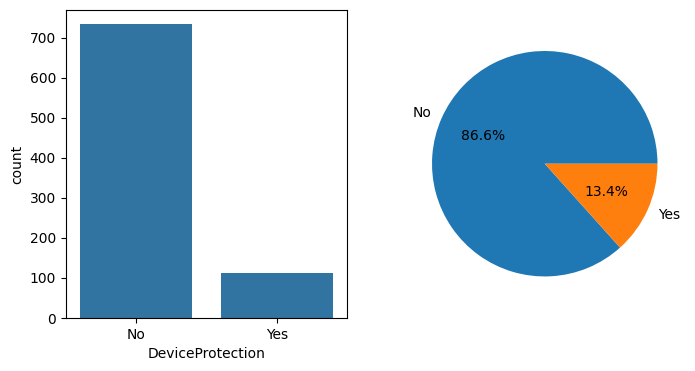

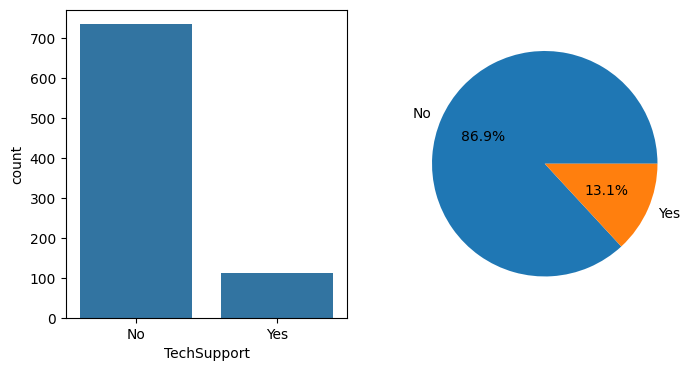

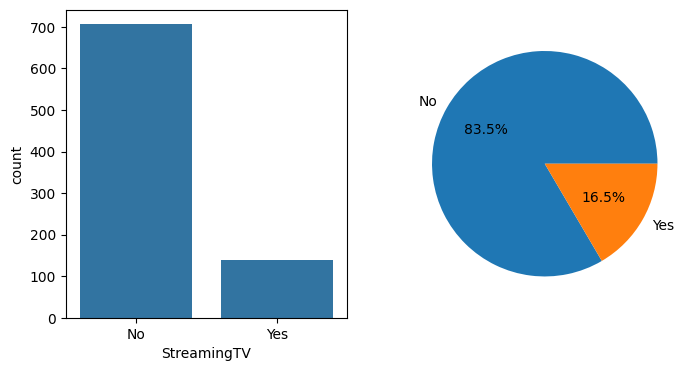

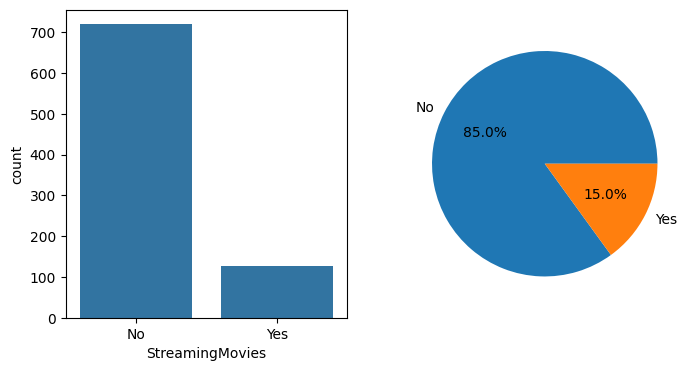

In [ ]:
for i in service_columns:
  pie_count_categorical(services_3_df , i)

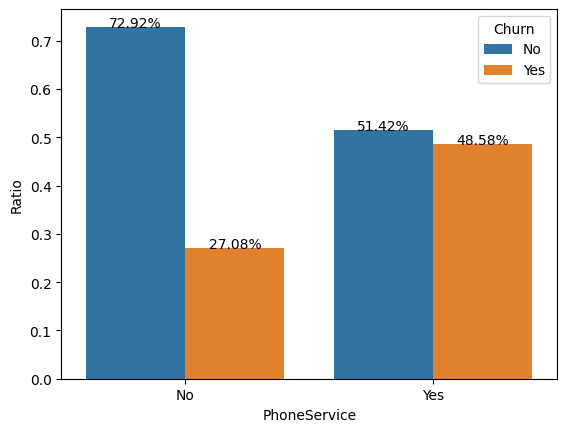

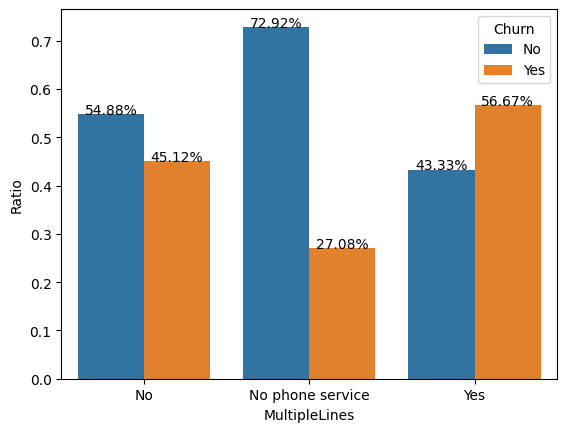

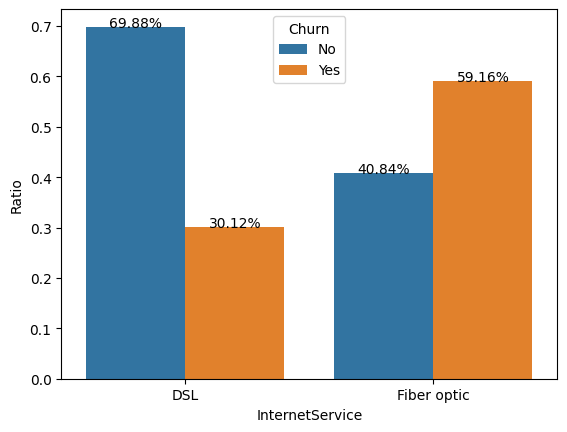

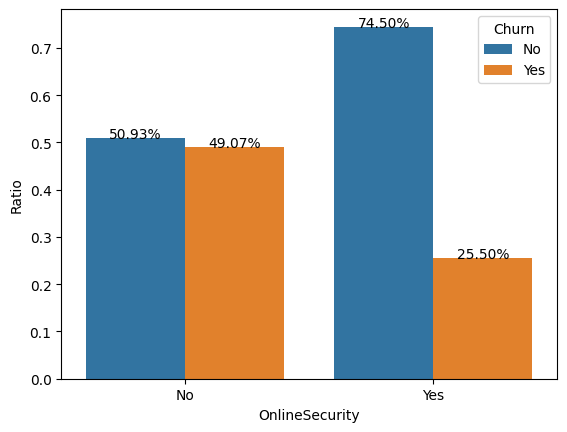

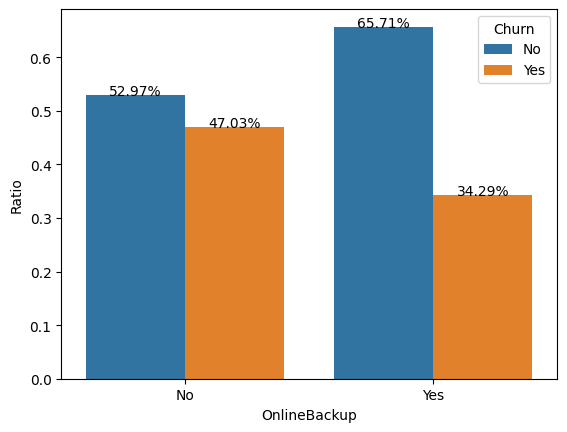

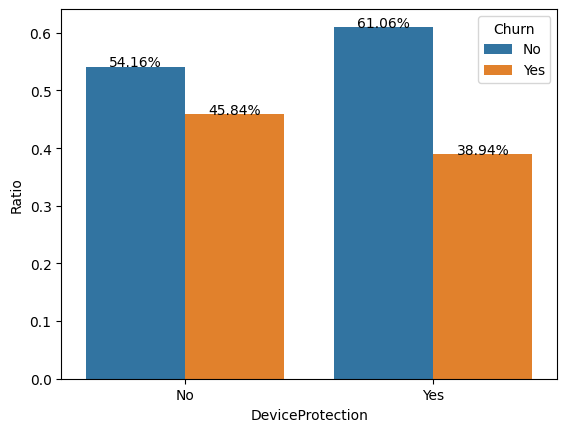

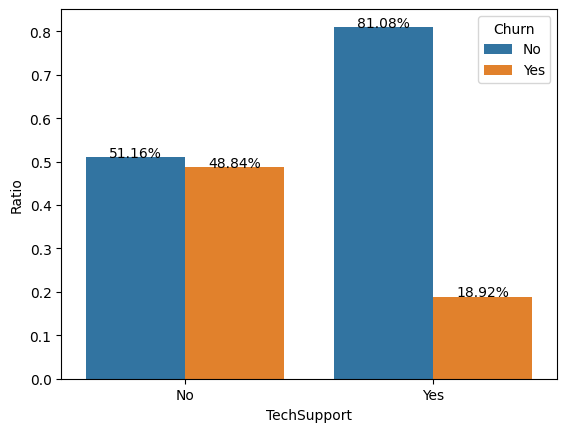

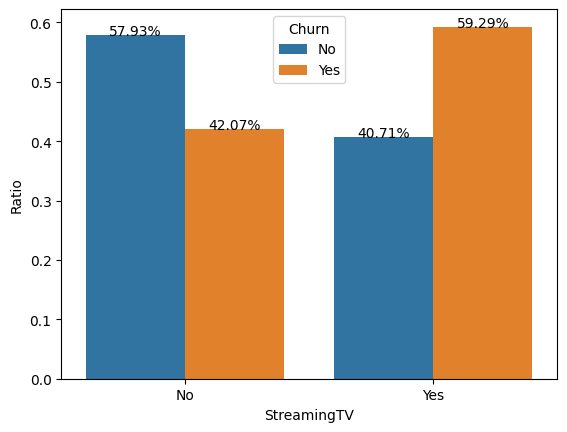

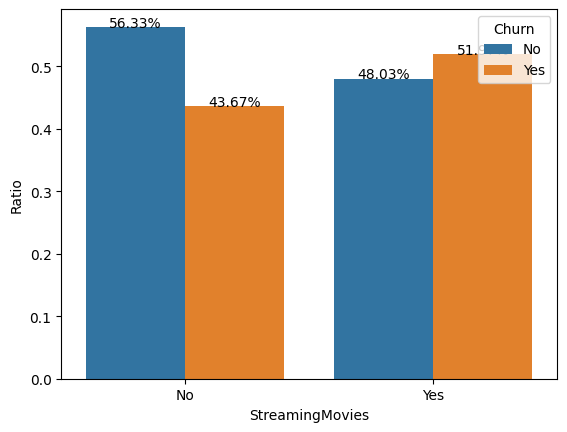

In [ ]:
for i in service_columns:
  plot_count_two_column_normalized(services_3_df , i , 'Churn')

In [ ]:
services_data.sum()

PhoneService        6361
MultipleLines       2971
InternetService     5517
OnlineSecurity      2019
OnlineBackup        2429
DeviceProtection    2422
TechSupport         2044
StreamingTV         2707
StreamingMovies     2732
dtype: int64

In [ ]:
services_1_df = df[df['TotalServices'] == 1]

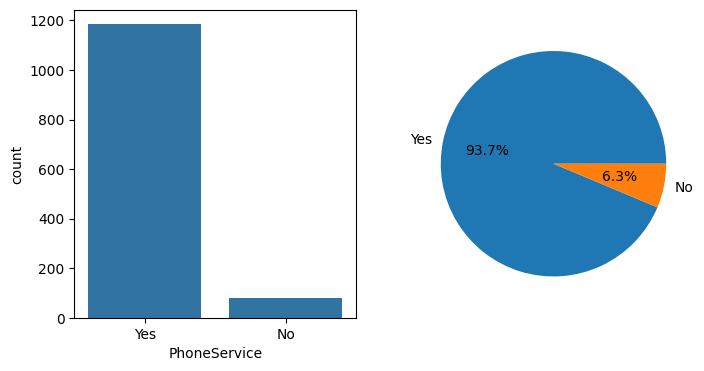

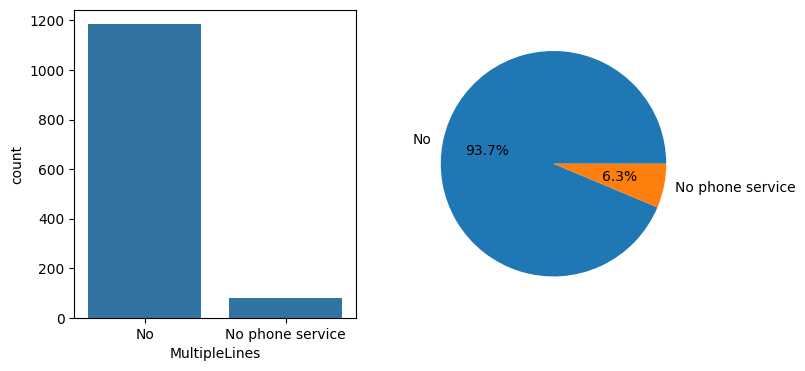

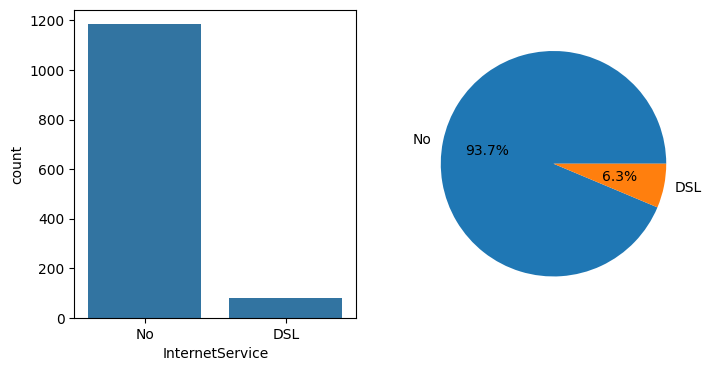

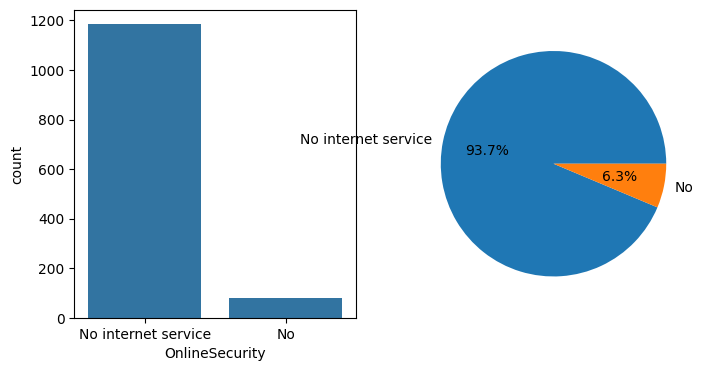

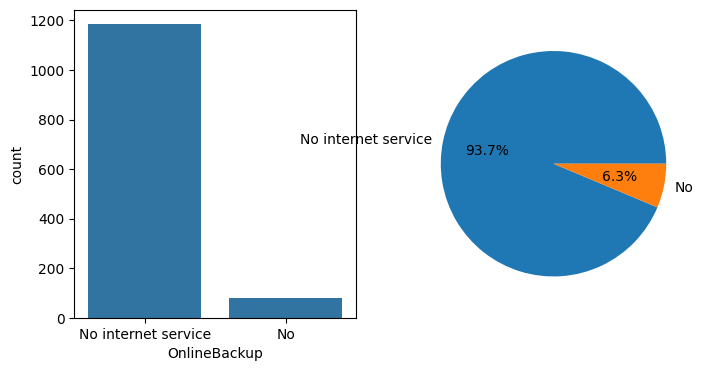

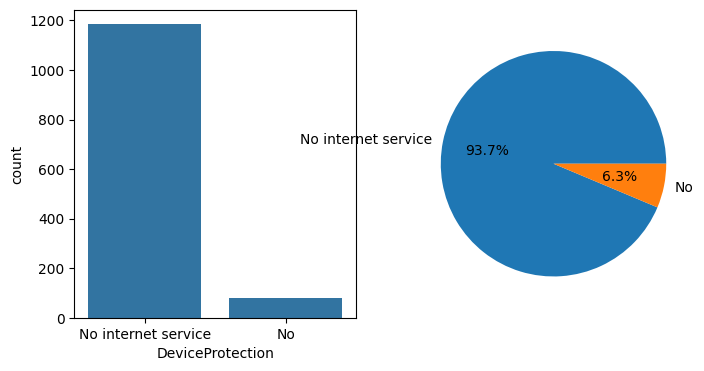

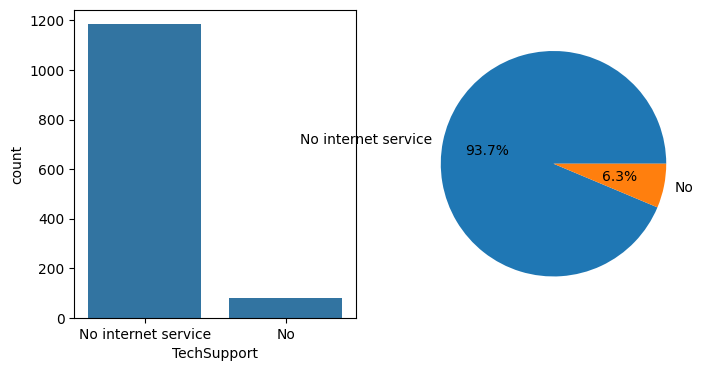

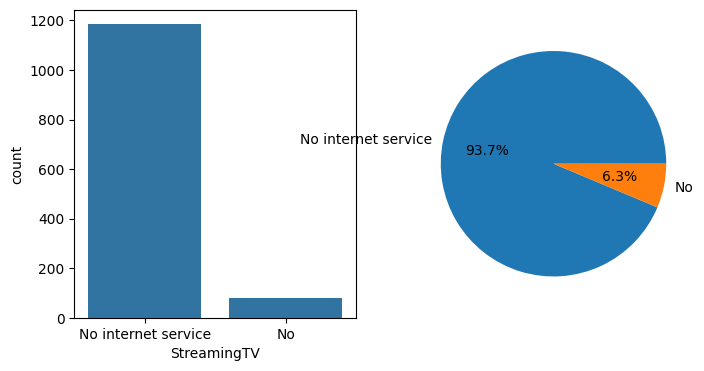

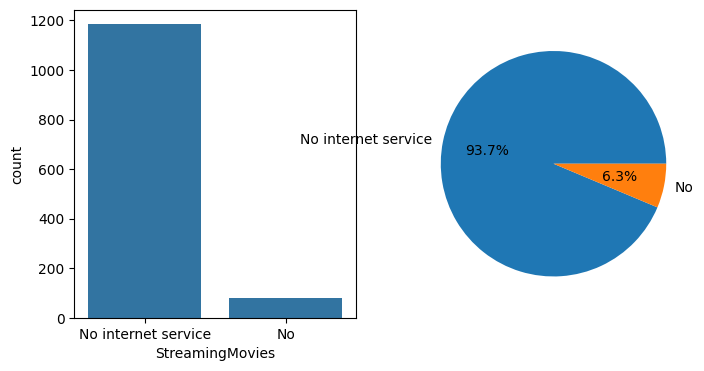

In [ ]:
for i in service_columns:
  pie_count_categorical(services_1_df , i)

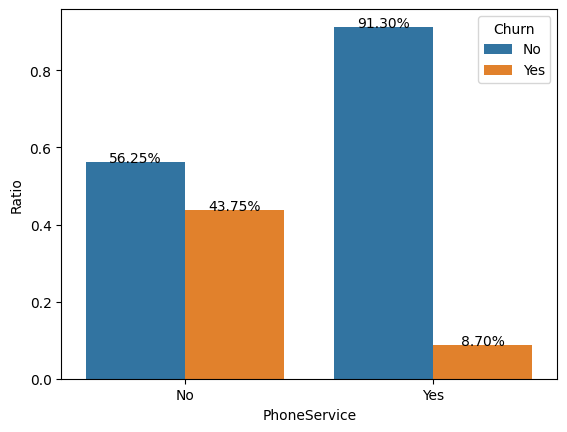

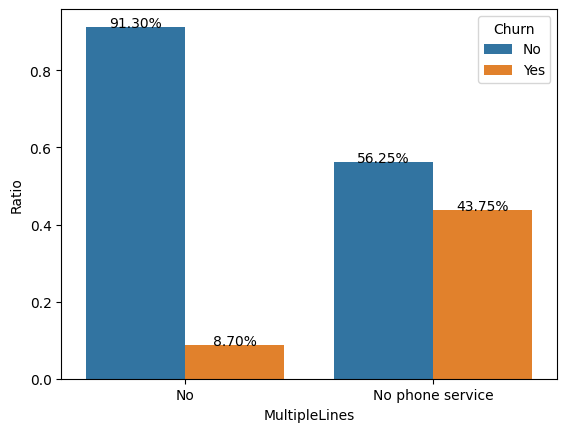

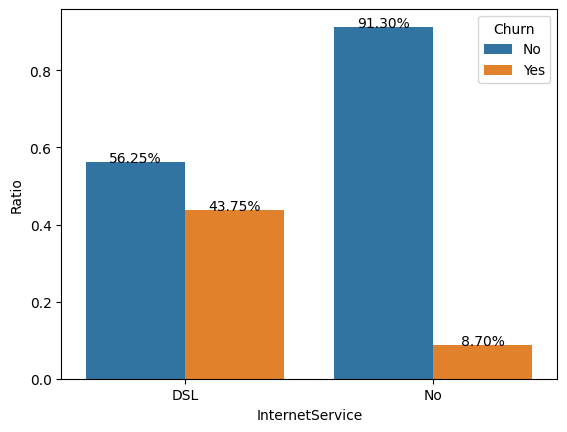

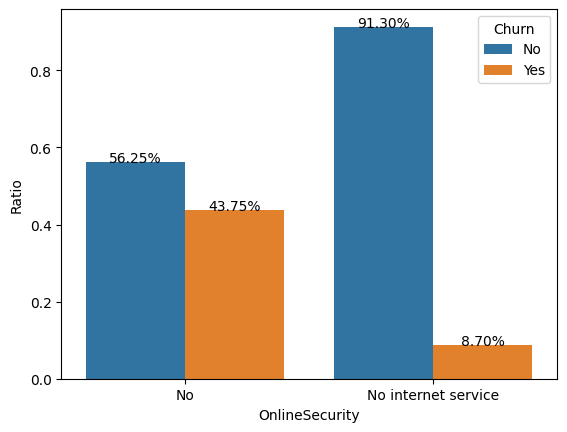

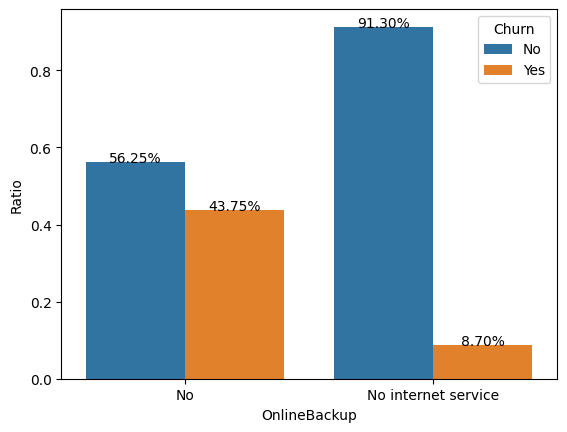

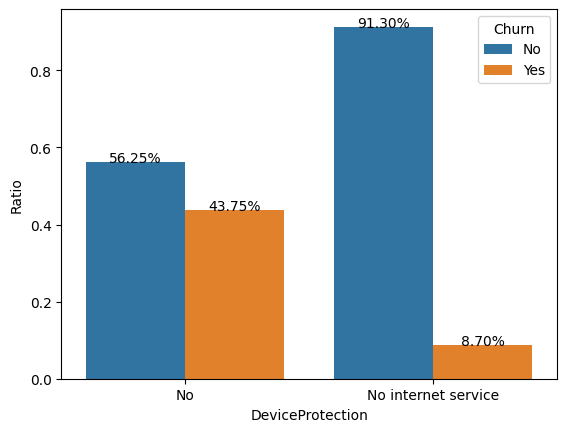

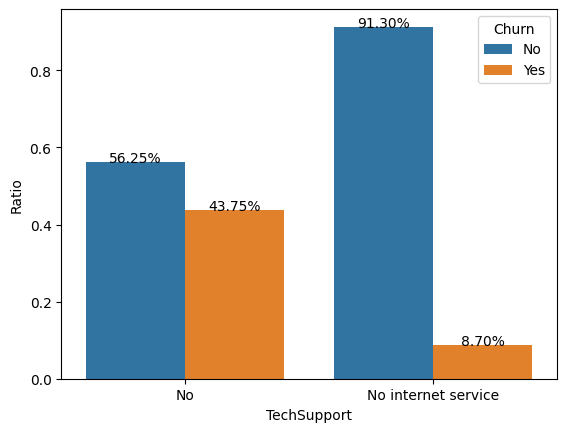

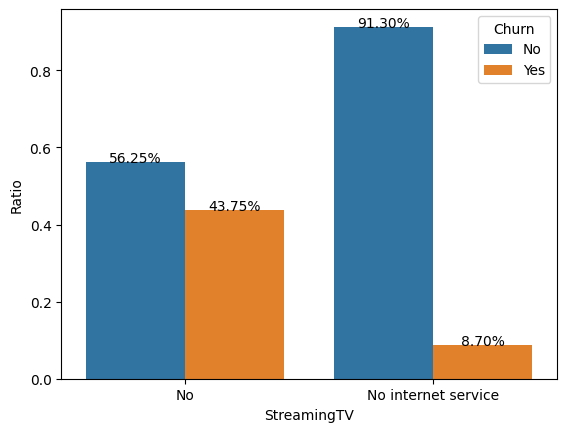

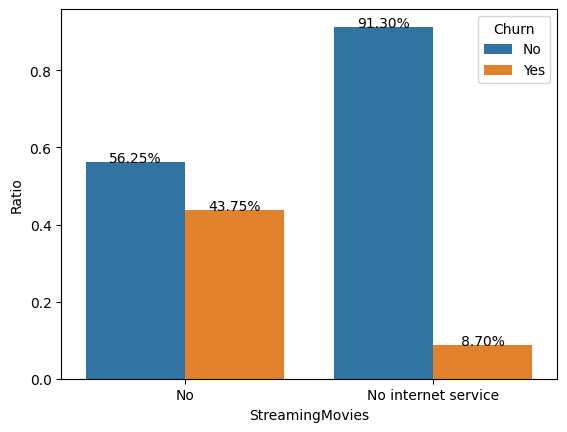

In [ ]:
for i in service_columns:
  plot_count_two_column_normalized(services_1_df , i , 'Churn')

### How many customers have fiber optic internet service, and how does this service type affect their monthly charges and churn rates?

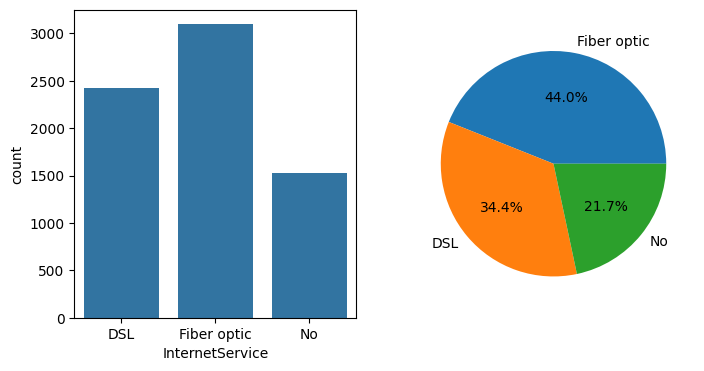

In [ ]:
pie_count_categorical(df , 'InternetService')

In [ ]:
#calculating the churn rate for each group
df.groupby('InternetService')['Churn'].value_counts(normalize=True)

InternetService  Churn
DSL              No       0.810409
                 Yes      0.189591
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925950
                 Yes      0.074050
Name: Churn, dtype: float64

In [ ]:
df['InternetServicesubscribers'] = df['InternetService'].replace({'DSL':'Yes','Fiber optic':'Yes'})
df['InternetServicesubscribers'].value_counts()

Yes    5517
No     1526
Name: InternetServicesubscribers, dtype: int64

In [ ]:
df.groupby('InternetServicesubscribers')['Churn'].value_counts(normalize=True)

InternetServicesubscribers  Churn
No                          No       0.925950
                            Yes      0.074050
Yes                         No       0.681711
                            Yes      0.318289
Name: Churn, dtype: float64

is there difference between the  internetservice subscribers and the other customers in churn rate ?

H0 : Pchurn_internetservie = Pchurn_no_internet_service

H1 :  Pchurn_internetservie != Pchurn_no_internet_service

In [ ]:
crs_tab = pd.crosstab(df['InternetServicesubscribers'], df['Churn'])
crs_tab

Churn,No,Yes
InternetServicesubscribers,,
No,1413,113
Yes,3761,1756


In [ ]:
#difference in proportion of the two groups
z_statistic, p_value = sm.stats.proportions_ztest(crs_tab['Yes'].values, crs_tab.sum(axis=1).values)
z_statistic, p_value

(-19.12515526956875, 1.5590850317785411e-81)

- Zscore = -19,   p_value is less than .05  

- we reject the Null hypothesis   
- there is significant  difference between the churn rate of the subscribers of the internet service and the other customers.

within the internet service subscribers , is there difference between churn rate of the DSL, and Fiber optic ??

H0 : PChurn_DSL = PChurn_FiberOptice

H1 :  PChurn_DSL != PChurn_FiberOptice

In [ ]:
#creating filter for the subscribesr of the internet service
internet_subs_filter = (df['InternetServicesubscribers'] == 'Yes')
df[internet_subs_filter].groupby('InternetService')['Churn'].value_counts(normalize=True)

InternetService  Churn
DSL              No       0.810409
                 Yes      0.189591
Fiber optic      No       0.581072
                 Yes      0.418928
Name: Churn, dtype: float64

In [ ]:
crs_tab2 = pd.crosstab(df[internet_subs_filter]['InternetService'], df[internet_subs_filter]['Churn'])
crs_tab2

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297


In [ ]:
z_statistic, p_value = sm.stats.proportions_ztest(crs_tab2['Yes'].values, crs_tab2.sum(axis=1).values)
z_statistic, p_value

(-18.147163580011767, 1.3520464229927545e-73)

- zscore = -18, p_value less than .05
- we reject the null hypothesis  
- We have enough evidence to conclude that the churnRate in Fiber Optic group is higher then the churn rate in DSL group

how the internet services affect Monthlycharges ?

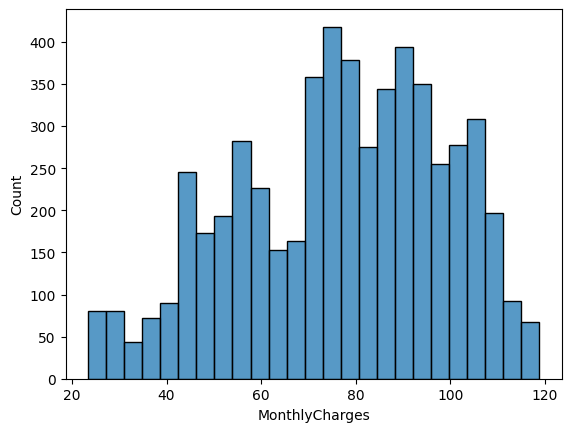

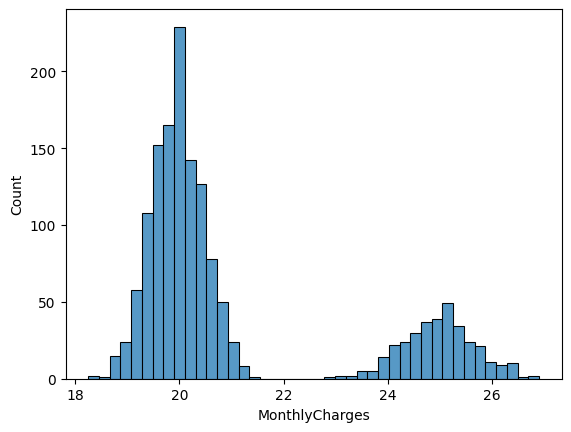

(count    5517.000000
 mean       76.844254
 std        21.924661
 min        23.450000
 25%        59.950000
 50%        79.450000
 75%        94.450000
 max       118.750000
 Name: MonthlyCharges, dtype: float64,
 count    1526.000000
 mean       21.079194
 std         2.164221
 min        18.250000
 25%        19.700000
 50%        20.150000
 75%        20.900000
 max        26.900000
 Name: MonthlyCharges, dtype: float64)

In [ ]:
sns.histplot(data=df[internet_subs_filter], x='MonthlyCharges')
plt.show()
sns.histplot(data=df[~internet_subs_filter], x='MonthlyCharges')
plt.show()
df[internet_subs_filter]['MonthlyCharges'].describe(), df[~internet_subs_filter]['MonthlyCharges'].describe()

Comparing the means of the two distributions ⁉

H0 : No_internet_monthlycharge_mean = internet_monthlycharge_mean

H1 : No_internet_monthlycharge_mean != internet_monthlycharge_mean

In [ ]:
t_statistic, p_value = stats.ttest_ind(df[internet_subs_filter]['MonthlyCharges'], df[~internet_subs_filter]['MonthlyCharges'])
t_statistic, p_value

(99.2201893560808, 0.0)

- we reject the NUll hypothsis  , and we can conclude that we have enough evidence to say the mean of the internetserivice subscribers is different than the other customers.
- from the test and the plots we can see that monthly charges of the internet service subscribesr is higher then the other customers  



is there a specific service in the internet services  that makes that effect in the monthlycharges ?

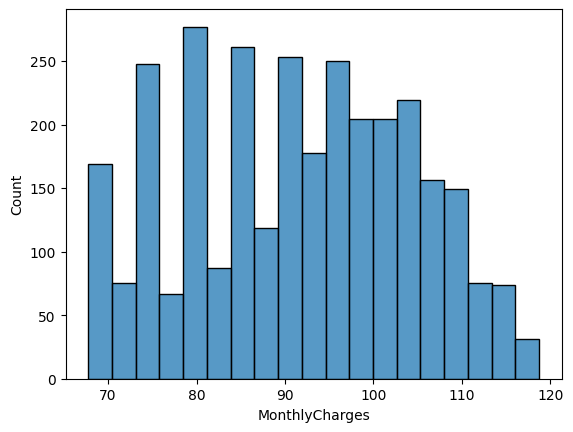

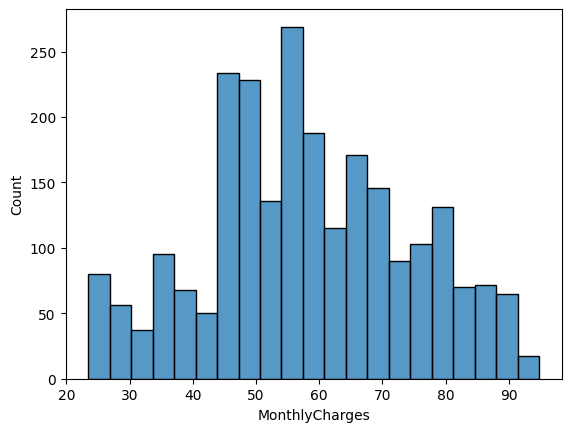

(count    3096.000000
 mean       91.500129
 std        12.663039
 min        67.750000
 25%        80.550000
 50%        91.675000
 75%       101.150000
 max       118.750000
 Name: MonthlyCharges, dtype: float64,
 count    2421.000000
 mean       58.102169
 std        16.259522
 min        23.450000
 25%        46.200000
 50%        56.150000
 75%        69.900000
 max        94.800000
 Name: MonthlyCharges, dtype: float64)

In [ ]:
sns.histplot(data=df[internet_subs_filter][df[internet_subs_filter]['InternetService'] == 'Fiber optic'], x='MonthlyCharges')
plt.show()
sns.histplot(data=df[internet_subs_filter][df[internet_subs_filter]['InternetService'] == 'DSL'], x='MonthlyCharges')
plt.show()
df[internet_subs_filter][df[internet_subs_filter]['InternetService'] == 'Fiber optic']['MonthlyCharges'].describe(), df[internet_subs_filter][df[internet_subs_filter]['InternetService'] == 'DSL']['MonthlyCharges'].describe()

- conducting ttest to see if there is statistically significant difference in means

H0 : DSL_monthly_mean = Fiber_optic_mothly_mean

H1 : DSL_monthly_mean != Fiber_optic_mothly_mean

In [ ]:
t_statistic, p_value = stats.ttest_ind(df[internet_subs_filter][df[internet_subs_filter]['InternetService'] == 'Fiber optic']['MonthlyCharges'],
                                       df[internet_subs_filter][df[internet_subs_filter]['InternetService'] == 'DSL']['MonthlyCharges'])
t_statistic, p_value

(85.77016447132821, 0.0)

t_value is 85.7 , p_value is zero
so we reject the null hypothesis

- there are enough evidence to conclude that the mean of the fiber optic group is higher then the DSL group

- since the churn rate in of the Fiber optic is higher than the DSL group,  and also the monthlycharges is higher than the DSL group
we are expecting that as the monthly charges increase the churn rate increase.

### How does the company's internet service offerings (DSL, fiber optic, or none) affect customers' usage of online security features?

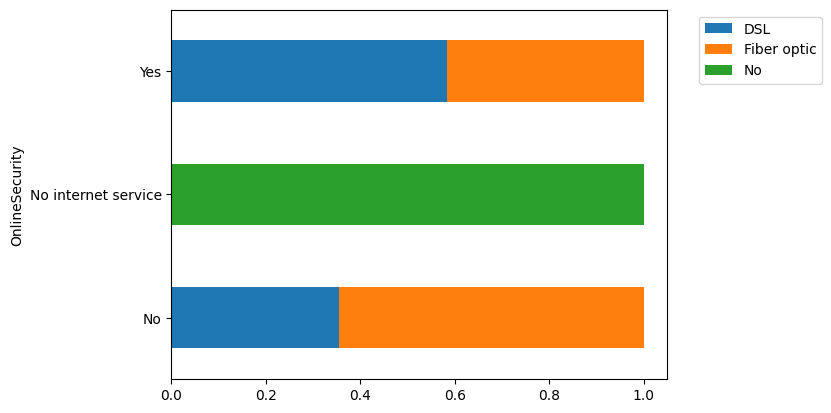

In [ ]:
tab_plot_h(df['OnlineSecurity'],df['InternetService'])

*   H0: Pij =Pi+ P+j for all i&j i.e, Internet service type and online security existence are independent
*   H1: Pij !=Pi+ P+j for all i&j i.e, Internet service type and online security existence are not independet

In [ ]:
chi2_test(df['InternetService'],df['OnlineSecurity'])

Statistic =  7393.058145571624 
P-value =  0.0


Since p-value < 0.05  we can reject the null hypothesis , therefore there is sufficient evidence that internet service type and online security subscription are not independent at significance level = 0.05

In [ ]:
##Creating new variable to assess the relationship betweeen internet service and online security on one hand and Churn status
##on the other hand
for index, row in df.iterrows():
    if row['OnlineSecurity'] == 'No internet service':
        df.at[index, 'OnlineSecurity_InternetService'] = 'No internet service'
    elif row['OnlineSecurity'] == 'Yes' and row['InternetService'] == 'DSL':
        df.at[index, 'OnlineSecurity_InternetService'] = 'DSL_OnlineSecurity'
    elif row['OnlineSecurity'] == 'Yes' and row['InternetService'] == 'Fiber optic':
        df.at[index, 'OnlineSecurity_InternetService'] = 'Fiber optic_OnlineSecurity'
    elif row['OnlineSecurity'] == 'No' and row['InternetService'] == 'DSL':
        df.at[index, 'OnlineSecurity_InternetService'] = 'DSL_No_OnlineSecurity'
    elif row['OnlineSecurity'] == 'No' and row['InternetService'] == 'Fiber optic':
        df.at[index, 'OnlineSecurity_InternetService'] = 'Fiber optic_No_OnlineSecurity'


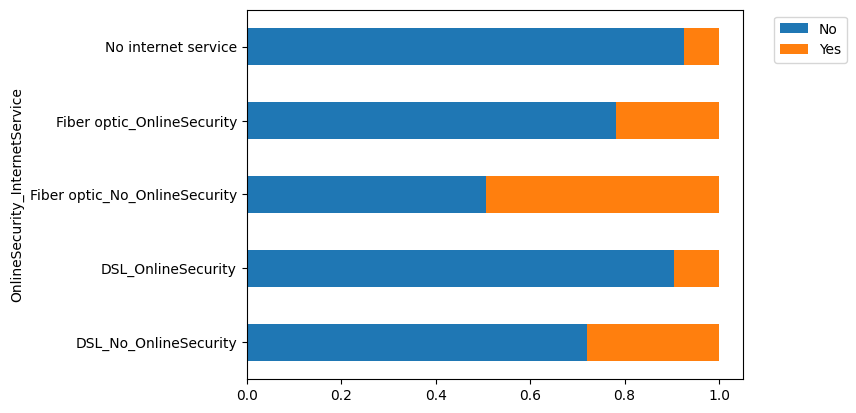

In [ ]:
tab_plot_h(df['OnlineSecurity_InternetService'],df['Churn'])

In [ ]:
chi2_test(df['OnlineSecurity_InternetService'],df['Churn'])

Statistic =  1076.2121564451252 
P-value =  1.0843607211110961e-231


Since p-value < 0.05  we can reject the null hypothesis , therefore there is sufficient evidence that OnlineSecurity_InternetService and churn status are not independent at significance level = 0.05

#### Users not subscribing for online security and using fiber optic internet service type are more likely to churn which is may be a result from the fact they may think that using fiber optic means no need for online security while it's important to use online security

#### We can offer online security service with fiber optic which may reduce churn rate a little however it seems that the best combination in terms of churn rate is the DSL and Online security

### Can contract type be related with churn rate?

In [ ]:
for index,row in df.iterrows():
    if row['Contract']=='Month-to-month':
        df.at[index,'Contract_Type_binary']='Monthly_contract'
    elif row['Contract']=='One year':
        df.at[index,'Contract_Type_binary']='Yearly_contract'
    elif row['Contract']=='Two year':
        df.at[index,'Contract_Type_binary']='Yearly_contract'

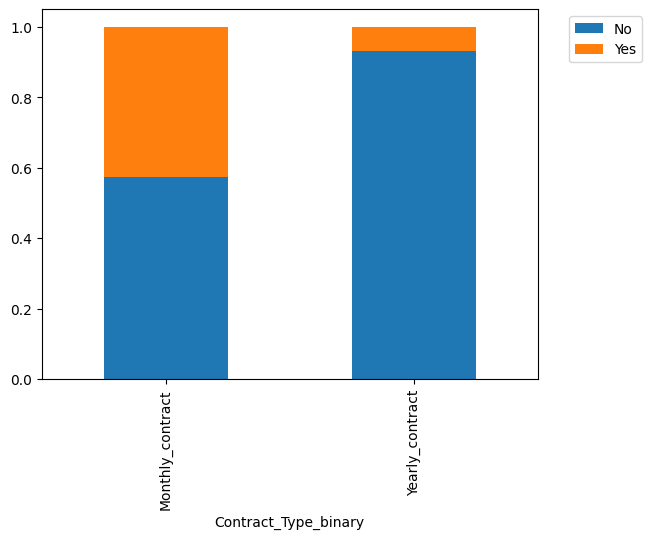

In [ ]:
tab_plot(df['Contract_Type_binary'],df['Churn'])


*  H0: Churn rate among users with monthly contracts <= Churn rate among users with yearly contracts     
   
*  H1: Churn rate among users with monthly contracts > Churn rate among users with yearly contracts

In [ ]:
pd.crosstab(index=df['Contract_Type_binary'] ,columns=df['Churn'],margins=True)

Churn,No,Yes,All
Contract_Type_binary,,,
Monthly_contract,2220,1655,3875
Yearly_contract,2954,214,3168
All,5174,1869,7043


In [ ]:
print('Statistic = ',proportions_ztest(count=np.array([1655,214]),nobs=np.array([3875,3168]),alternative='larger')[0], '\n',
      'p-value = ',proportions_ztest(count=np.array([1655,214]),nobs=np.array([3875,3168]),alternative='larger')[1])

Statistic =  33.9972827968623 
 p-value =  1.2218025629950136e-253


p-value< 0.05 , we can reject the null hypothesis therefore there is sufficient evidence that churn rate for users with monthly contracts is greater than churn rate among users with yearly contracts at significance level = 0.05

#### we can give more attractive yearly contracts offers to new customers and use monthly contracts as an indication of the possibility of churn

### What about partners , dependents and churn rate?

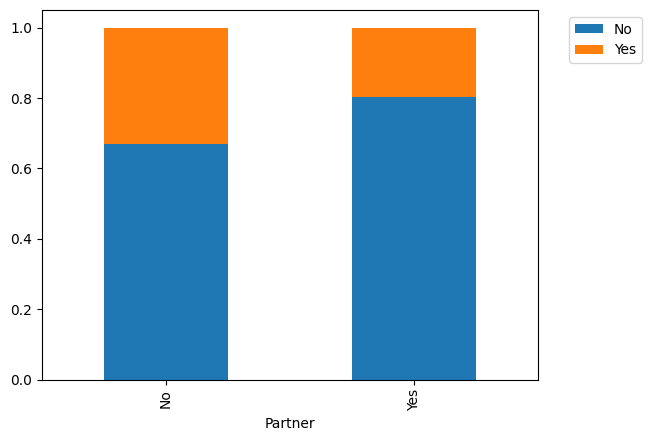

In [ ]:
tab_plot(df['Partner'],df['Churn'])


*  H0: Churn rate among customers with partners >= Churn rate among customers with no partners
   
*  H1: Churn rate among customers with partners < Churn rate among customers with no partners

In [ ]:
pd.crosstab(index=df['Partner'],columns=df['Churn'],margins=True)

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


In [ ]:
print('Statistic = ',proportions_ztest(count=np.array([669,1200]),nobs=np.array([3402,3641]),alternative='smaller')[0], '\n',
      'p-value = ',proportions_ztest(count=np.array([669,1200]),nobs=np.array([3402,3641]),alternative='smaller')[1])

Statistic =  -12.62594663510133 
 p-value =  7.59518310049839e-37


p-value < 0.05 , we can  reject the null hypothesis , therefore there is sufficient evidence that the churn rate among customers with partners is smaller than that among customers with no partners

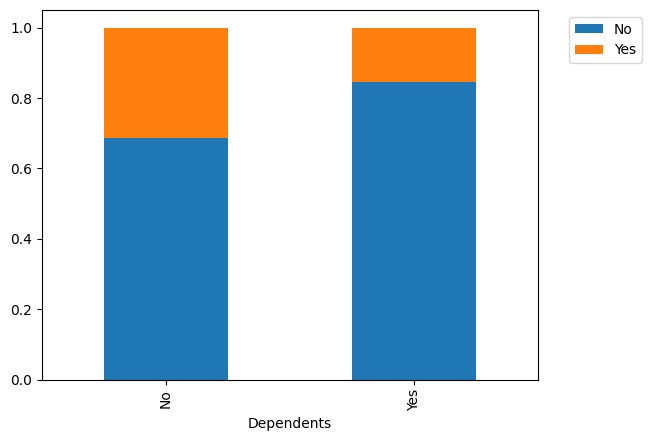

In [ ]:
tab_plot(df['Dependents'],df['Churn'])


*  H0: Churn rate among customers with dependents >= Churn rate among customers with no dependents
   
*  H1: Churn rate among customers with dependents < Churn rate among customers with no dependents

In [ ]:
pd.crosstab(index=df['Dependents'],columns=df['Churn'],margins=True)

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


In [ ]:
print('Statistic = ',proportions_ztest(count=np.array([326,1543]),nobs=np.array([2110,4933]),alternative='smaller')[0], '\n',
      'p-value = ',proportions_ztest(count=np.array([326,1543]),nobs=np.array([2110,4933]),alternative='smaller')[1])

Statistic =  -13.781884265707227 
 p-value =  1.6380414046988424e-43


p-value < 0.05 , we can  reject the null hypothesis , therefore there is sufficient evidence that the churn rate among customers with dependents is smaller than that among customers with no dependents

#### Offering some free services or free line subscription for a partner or a dependent of a customer or may be a close friend may reduce the possibility of churn

### Age and churn rate?

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].replace("1","SeniorCitizen",regex=True)
df['SeniorCitizen']=df['SeniorCitizen'].replace("0","Not a SeniorCitizen",regex=True)

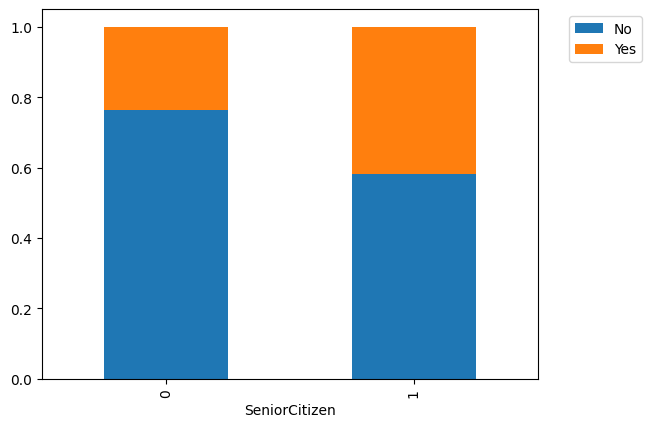

In [ ]:
tab_plot(df['SeniorCitizen'],df['Churn'])

*  H0: Churn rate among senior citizens <= Churn rate among non senior citizens
   
*  H1: Churn rate among senior citizens > Churn rate among non senior citizens

In [ ]:
pd.crosstab(index=df['SeniorCitizen'],columns=df['Churn'],margins=True)

Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


In [ ]:
print('Statistic = ',proportions_ztest(count=np.array([476,1393]),nobs=np.array([1142,5901]),alternative='larger')[0], '\n',
      'p-value = ',proportions_ztest(count=np.array([476,1393]),nobs=np.array([1142,5901]),alternative='larger')[1])

Statistic =  12.663022223987696 
 p-value =  4.738951753688018e-37


p-value < 0.05 , we can  reject the null hypothesis , therefore there is sufficient evidence that the churn rate among senior citizens is larger than that among non senior citizens



### How many customers have multiple phone lines, and what is the most common reason for customers to have multiple phone lines and is there relation between it and churn rate?

Churn and Multiple Lines

In [ ]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
total_count = df['MultipleLines'].count()
yes_count = df['MultipleLines'].value_counts()['Yes']
yes_percentage = (yes_count / total_count) * 100
print("Number of customers who have multiple lines is:", yes_count)
print("Percentage of customers who have multiple lines': {:.2f}%".format(yes_percentage))

Number of customers who have multiple lines is: 2971
Percentage of customers who have multiple lines': 42.18%


Relation Between Churn Rate and Multiple Lines

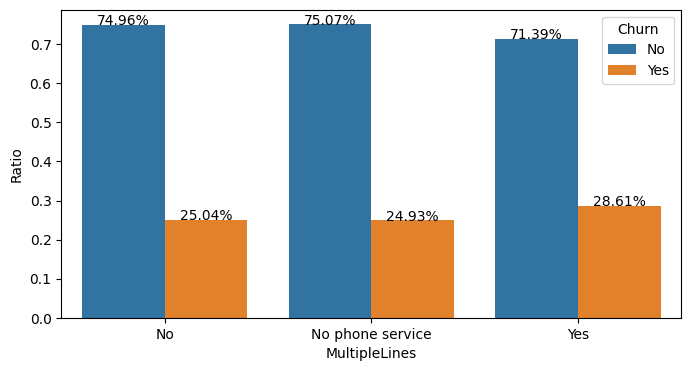

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df , 'MultipleLines', 'Churn')

Multiple Lines column has three categories although the answer in this case needs to be either Yes or No.We have categories:Yes,No,No Phone service."No phone service" is a redundant category which is equavelant to "No" category. If the customer doesn't have phone service (phone_service = No), it implicitly mean they can't have multiple lines service.







Yet,before changing those with "No phone service" to "No",we need to have a look on the association between Churn and Multiple lines.

In [ ]:
contingency_table = pd.crosstab(df['MultipleLines'], df['Churn'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850
Chi-square statistic: 11.33044148319756
P-value: 0.0034643829548773


There is  significant association between Churn and Multiple Lines can be seen.However,if one of the categories is adding redundency to the test,we expect that after considering it to one the binary Yes,No categories,the test will hae a higher sensitivity and more significant p-value.
We can dig deeper in each category in Multiple Lines relation with Churn.



first z-test between the Yes and No categories and excluding No phone service

In [ ]:
crs_tab = pd.crosstab(df[df['MultipleLines'] != 'No phone service']['MultipleLines'], df['Churn'])
z_statistic, p_value = sm.stats.proportions_ztest(crs_tab['Yes'].values, crs_tab.sum(axis=1).values)
z_statistic, p_value

(-3.2067824673077823, 0.0013422845459112847)

we can conclude that there is a signifcant difference between both categories

second z-test between the No and No-phone service categories

In [ ]:
crs_tab2 = pd.crosstab(df[df['MultipleLines'] != 'Yes']['MultipleLines'], df['Churn'])
z_statistic, p_value = sm.stats.proportions_ztest(crs_tab2['Yes'].values, crs_tab2.sum(axis=1).values)
z_statistic, p_value

(0.06467118316542406, 0.9484358072789603)

we can conclude that there high p-value fails to reject the alternate hypotheses and confirms no significant difference between the groups "No" and "No phone Service"

We can conclude that the high p-value between (No,No Phone Service) indicates that the difference in churn rates between the two categories is not statistically significant.This result aligns with our assumption that "No Phone Service" is redundant.







We can now consider "No" and "No Phone Service" as single category

In [ ]:
df['MultipleLines']= df['MultipleLines'].replace('No phone service','No')

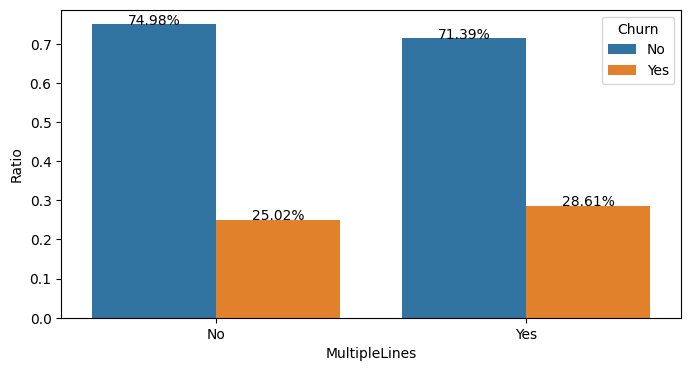

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df , 'MultipleLines', 'Churn')

It is clear that customers with multiple lines have more churn rate.We can say that churn rate is affected by the factor of having multiple lines.

Testing this insight of variability between Churn rate and multiple lines

In [ ]:
contingency_table = pd.crosstab(df['MultipleLines'], df['Churn'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Churn            No   Yes
MultipleLines            
No             3053  1019
Yes            2121   850
Chi-square statistic: 11.143251001456251
P-value: 0.0008433795342472428


We conclude that there is a significant association between the "MultipleLines" and "Churn" attributes.

Reasons for customers to have multiple phones line:

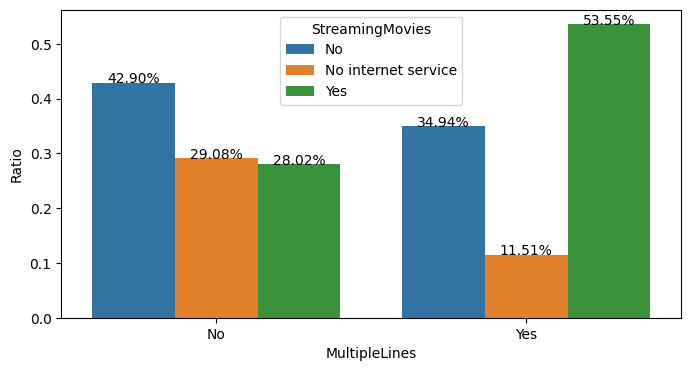

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df , 'MultipleLines', 'StreamingMovies')

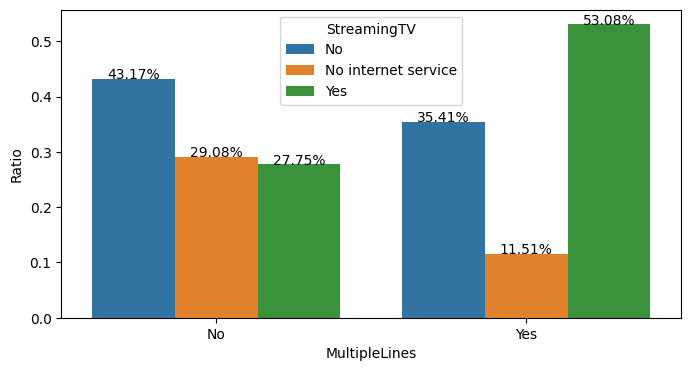

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df , 'MultipleLines', 'StreamingTV')

From plotting against StreamingTV,StreamingMovies can say that customers with multiple lines tend to have higher subscription to those services

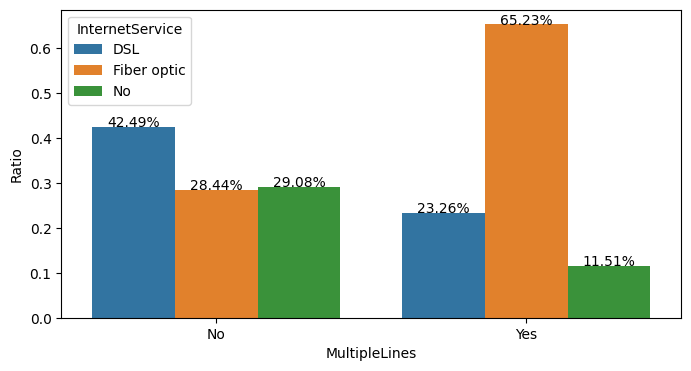

In [ ]:
plt.figure(figsize=(8,4))
_ = plot_count_two_column_normalized(df , 'MultipleLines', 'InternetService')

From plotting against Internet Service,we can say that customers with multiple lines tend to have Fiber Optic service

Conclusion

Multiple lines is seen more in customers who subscribe to additional services as streaming and those who seek better connection with the fiber optics.This can be explained by having a line dedicated for every service for better reliability since they also prefer the fiber optic connection. Customers with high data usage requirements, such as businesses or households with multiple users streaming content at the same time, may benefit from multiple lines.

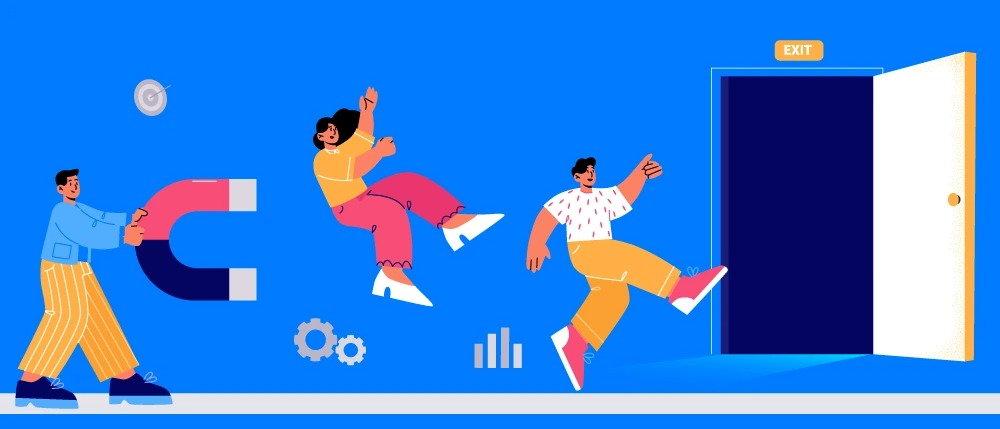

### Conclusion and Recommendation

- Higher churn rates exist among Fiber Optics users so for a short-term solution the company should make offers to attract them maybe by discounting their monthly charges  and as long-term plan, the company should pay attention to the infrastructure or dig in to see what is causing this problem.
- Offers on yearly contracts as users with yearly contracts are more likely to churn.
- We can use monthly contracts are an indicator of churning.
- Online security offers for fiber optic users to decrease churn rate.
- Free services or free line subscription for a partner, dependent or close friend to reduce the possibility of churn.
- Make bundles for customers with multiple lines that include subscriptions to streaming service and fiber optic connection.

